# 1. Environment Setup

In [15]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]
mRNA_peak_150_file = doc["mRNA_peak_150_file"]
supplemental = doc["supplemental"]
tss_annotation = doc['tss_annotation']

import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
import time

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('Number of tissues: ', 15)


In [2]:
from create_output import *

In [3]:
sys.path.append("/home/isshamie/software/homebrew/parallel_functions/")
import parallel_functions as pf

In [4]:
import motif_analysis

In [5]:
motif_folder = doc['motif_folder']
motifs_of_interest = map(lambda x: os.path.basename(x).split('.')[0],glob.glob(motif_folder + '/*motif'))
motifs_of_interest

['scl',
 'cdx2',
 'fli',
 'pu1',
 'elf3',
 'klf10',
 'sp5',
 'oct2',
 'ebna1',
 'phox2a',
 'hinfp',
 'bcl6',
 'smad4',
 'pknox1',
 'gata3',
 'myf5',
 'staf',
 'pbx2',
 'tbet',
 'znf528',
 'pax7-longest',
 'spdef',
 'tra',
 'klf14',
 'nrf',
 'p53-myc',
 'gata3',
 'sp2',
 'foxa1',
 'hif2a',
 'vdr',
 'znf264',
 'gabp',
 'tead',
 'irf1',
 'sf1',
 'znf136',
 'p65',
 'klf6',
 'stat6',
 'tcf7l2',
 'zscan22',
 'six4',
 'gfi1b',
 'foxl2',
 'tr4',
 'gata3',
 'mef2d',
 'grhl2',
 'ptf1a',
 'znf322',
 'lxre',
 'ar-half',
 'npas',
 'fosl2',
 'arnt',
 'gata3',
 'lhx2',
 'nfat-ap1',
 'ets-runx',
 'erg',
 'meis1',
 'tbx20',
 'znf675',
 'hoxd12',
 'nfatc1',
 'rfx2',
 'znf415',
 'hnf1b',
 'e2f6',
 'usf2',
 'foxo3',
 'pit1-long',
 'ews-fli1',
 'oct',
 'ehf',
 'are-fox',
 'pax3-fkhr',
 'jun-cre',
 'sox3',
 'limb',
 'runx1m',
 'tfe3',
 'stat1',
 'couptf2',
 'heb',
 'zfp809',
 'nfy',
 'gata2',
 'p53',
 'zfp281',
 'brn2',
 'jun-ap1',
 'elf1',
 'rxr',
 'atf7',
 'zic3',
 'foxa2',
 'pax5',
 'pax7-long',
 'znf416

## Create directory

In [6]:
out_dir = "Results/Figures/SuppFigure3/"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

# 2. Preprocessing

## Create Fasta file for the output bed sequences

In [6]:
bed_file = "Results/output/TSS1.exp.bed"
out_f = os.path.join(out_dir,"TSS1.exp.fa")
cmd = "homerTools extract {bed_f} {ref_fa} -fa > {out_f}".format(bed_f=bed_file,ref_fa=ref_fa,out_f=out_f)
!{cmd}
#Homer.extract_peak_sequences(bed_file,peak_list,genome,f_save,upstream=1000,downstream=100)


	Extracting sequences from file: /data/isshamie/genome/picr_final/picr.fa
	Looking for peak sequences in a single file (/data/isshamie/genome/picr_final/picr.fa)
	Extracting 1425 sequences from picr_0
	Extracting 751 sequences from picr_4
	Extracting 541 sequences from picr_5
	Extracting 446 sequences from picr_12
	Extracting 423 sequences from picr_13
	Extracting 399 sequences from picr_15
	Extracting 211 sequences from picr_17
	Extracting 275 sequences from picr_18
	Extracting 350 sequences from picr_19
	Extracting 403 sequences from picr_20
	Extracting 249 sequences from picr_21
	Extracting 754 sequences from picr_22
	Extracting 133 sequences from picr_26
	Extracting 397 sequences from picr_27
	Extracting 209 sequences from picr_28
	Extracting 169 sequences from picr_31
	Extracting 102 sequences from picr_32
	Extracting 250 sequences from picr_33
	Extracting 658 sequences from picr_35
	Extracting 271 sequences from picr_36
	Extracting 131 sequences from picr_42
	Extracting 207 sequ

	Extracting 1 sequences from picr_1410
	Extracting 1 sequences from picr_1425
	Extracting 1 sequences from picr_1490
	Extracting 1 sequences from picr_1501
	Extracting 2 sequences from picr_1503
	Extracting 1 sequences from picr_1628
	Extracting 3 sequences from picr_1669
	Extracting 1 sequences from picr_1677
	Extracting 5 sequences from picr_1757
	Extracting 239 sequences from picr_7a
	Extracting 810 sequences from picr_1
	Extracting 553 sequences from picr_10
	Extracting 273 sequences from picr_103
	Extracting 197 sequences from picr_106
	Extracting 26 sequences from picr_107
	Extracting 146 sequences from picr_108
	Extracting 378 sequences from picr_11
	Extracting 51 sequences from picr_121
	Extracting 307 sequences from picr_14
	Extracting 438 sequences from picr_16
	Extracting 1145 sequences from picr_2
	Extracting 544 sequences from picr_23
	Extracting 508 sequences from picr_24
	Extracting 115 sequences from picr_25
	Extracting 374 sequences from picr_29
	Extracting 818 sequenc

## Do the same for reference. Also need to create the bed file beforehand

In [8]:
bed_f = "Results/output/TSS1.exp.bed"
meta_f = "Results/output/TSS1.exp.meta"
save_f = os.path.join(out_dir,"TSS1.exp_refseq_centered.bed")
refseq_f = mRNA_peak_150_file
exp_bed_to_refseq(bed_f, meta_f, refseq_f, save_f = save_f)
out_f= os.path.join(out_dir,os.path.basename(save_f).replace(".bed",".fa"))

cmd = "homerTools extract {bed_f} {ref_fa} -fa > {out_f}".format(bed_f=save_f,ref_fa=ref_fa,out_f=out_f)
print(cmd)
!{cmd}

homerTools extract Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.bed /data/isshamie/genome/picr_final/picr.fa -fa > Results/Figures/SuppFigure3/TSS1.exp_refseq_centered.fa

	Extracting sequences from file: /data/isshamie/genome/picr_final/picr.fa
	Looking for peak sequences in a single file (/data/isshamie/genome/picr_final/picr.fa)
	Extracting 1425 sequences from picr_0
	Extracting 751 sequences from picr_4
	Extracting 541 sequences from picr_5
	Extracting 446 sequences from picr_12
	Extracting 423 sequences from picr_13
	Extracting 399 sequences from picr_15
	Extracting 211 sequences from picr_17
	Extracting 275 sequences from picr_18
	Extracting 350 sequences from picr_19
	Extracting 403 sequences from picr_20
	Extracting 249 sequences from picr_21
	Extracting 754 sequences from picr_22
	Extracting 133 sequences from picr_26
	Extracting 397 sequences from picr_27
	Extracting 209 sequences from picr_28
	Extracting 169 sequences from picr_31
	Extracting 102 sequences from picr_

	Extracting 1 sequences from picr_954
	Extracting 1 sequences from picr_964
	Extracting 1 sequences from picr_997
	Extracting 1 sequences from picr_1030
	Extracting 1 sequences from picr_1034
	Extracting 2 sequences from picr_1046
	Extracting 1 sequences from picr_1059
	Extracting 1 sequences from picr_1064
	Extracting 1 sequences from picr_1097
	Extracting 2 sequences from picr_1137
	Extracting 2 sequences from picr_1165
	Extracting 1 sequences from picr_1232
	Extracting 1 sequences from picr_1410
	Extracting 1 sequences from picr_1425
	Extracting 1 sequences from picr_1490
	Extracting 1 sequences from picr_1501
	Extracting 2 sequences from picr_1503
	Extracting 1 sequences from picr_1628
	Extracting 3 sequences from picr_1669
	Extracting 1 sequences from picr_1677
	Extracting 5 sequences from picr_1757
	Extracting 239 sequences from picr_7a
	Extracting 810 sequences from picr_1
	Extracting 553 sequences from picr_10
	Extracting 273 sequences from picr_103
	Extracting 197 sequences fr

In [ ]:
motifs_of_interest = ['inr','tata', 'sp1', 'ctcf']
motifs_of_interest = ['inr']
fa_file = os.path.join(out_dir,"TSS1.exp.fa")
f_save = 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)

0it [00:00, ?it/s]

inr


22555it [17:59, 23.26it/s]

## 3. Motif Generation

### Experimental

In [7]:
t = time.time()
motifs_of_interest = ['inr']
fa_file = os.path.join(out_dir,"TSS1.exp.fa")

f_save = 'Results/Figures/SuppFigure3/TSS_exp_instance_bin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=True)
print(t - time.time())

inr
('Number of records', 35247)
('max length of a sequence: ', 150)


100%|██████████| 35247/35247 [1:16:42<00:00,  7.66it/s]


Time taken: 4606
-4608.65337896


In [8]:
t = time.time()
motifs_of_interest = ['inr']
fa_file = os.path.join(out_dir,"TSS1.exp.fa")

f_save = 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)
print(t - time.time())

0it [00:00, ?it/s]

inr


35247it [18:07, 32.41it/s]


Time taken: 1088
-1088.25026202


In [ ]:
t = time.time()
motifs_of_interest = ['inr']
fa_file = os.path.join(out_dir,"TSS1.exp.fa")

f_save = 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbinV2'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)
print(t - time.time())

4it [00:00, 39.25it/s]

inr


31117it [14:54, 34.63it/s]

### Refseq

In [11]:
t = time.time()
motifs_of_interest = ['inr']
fa_file = os.path.join(out_dir,"TSS1.exp_refseq_centered.fa")

f_save = 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)
print(time.time()-t)



0it [00:00, ?it/s]

4it [00:00, 35.04it/s]

inr




8it [00:00, 34.38it/s]

12it [00:00, 34.05it/s]

15it [00:00, 32.66it/s]

18it [00:00, 31.53it/s]

22it [00:00, 31.59it/s]

25it [00:00, 30.97it/s]

29it [00:00, 31.21it/s]

33it [00:01, 31.94it/s]

37it [00:01, 32.67it/s]

41it [00:01, 33.27it/s]

45it [00:01, 33.15it/s]

49it [00:01, 31.80it/s]

53it [00:01, 32.46it/s]

57it [00:01, 31.60it/s]

61it [00:01, 30.55it/s]

65it [00:02, 30.79it/s]

69it [00:02, 31.41it/s]

73it [00:02, 32.65it/s]

77it [00:02, 32.12it/s]

81it [00:02, 31.90it/s]

85it [00:02, 31.38it/s]

89it [00:02, 31.70it/s]

93it [00:02, 31.17it/s]

97it [00:03, 30.61it/s]

101it [00:03, 31.03it/s]

105it [00:03, 31.63it/s]

109it [00:03, 31.70it/s]

113it [00:03, 31.42it/s]

117it [00:03, 30.01it/s]

121it [00:03, 29.76it/s]

124it [00:03, 29.01it/s]

127it [00:04, 27.99it/s]

131it [00:04, 28.62it/s]

135it [00:04, 29.46it/s]

138it [00:04, 29.47it/s]

141it [00:04, 29.42it/s]

145it [00:04, 29.65it/s]

149it [00:04, 30.23it/s]

153it [00:04, 30.65it/s]

157it [00

1939it [01:03, 30.13it/s]

1943it [01:03, 29.91it/s]

1946it [01:04, 29.58it/s]

1950it [01:04, 30.08it/s]

1954it [01:04, 30.01it/s]

1958it [01:04, 30.01it/s]

1962it [01:04, 30.78it/s]

1966it [01:04, 31.59it/s]

1970it [01:04, 32.12it/s]

1974it [01:04, 32.18it/s]

1978it [01:05, 32.77it/s]

1982it [01:05, 33.04it/s]

1986it [01:05, 33.19it/s]

1990it [01:05, 32.23it/s]

1994it [01:05, 32.04it/s]

1998it [01:05, 31.96it/s]

2002it [01:05, 31.05it/s]

2006it [01:05, 30.24it/s]

2010it [01:06, 30.59it/s]

2014it [01:06, 31.20it/s]

2018it [01:06, 30.72it/s]

2022it [01:06, 31.41it/s]

2026it [01:06, 31.32it/s]

2030it [01:06, 30.59it/s]

2034it [01:06, 30.27it/s]

2038it [01:07, 30.70it/s]

2042it [01:07, 31.39it/s]

2046it [01:07, 30.82it/s]

2050it [01:07, 30.51it/s]

2054it [01:07, 29.80it/s]

2057it [01:07, 29.42it/s]

2061it [01:07, 30.07it/s]

2065it [01:07, 30.84it/s]

2069it [01:08, 31.68it/s]

2073it [01:08, 31.52it/s]

2077it [01:08, 28.97it/s]

2080it [01:08, 29.00it/s]

2

3828it [02:06, 29.77it/s]

3832it [02:06, 30.70it/s]

3836it [02:06, 31.09it/s]

3840it [02:06, 30.78it/s]

3844it [02:06, 30.31it/s]

3848it [02:06, 30.33it/s]

3852it [02:06, 30.33it/s]

3856it [02:06, 31.38it/s]

3860it [02:07, 30.81it/s]

3864it [02:07, 30.49it/s]

3868it [02:07, 30.11it/s]

3872it [02:07, 29.95it/s]

3876it [02:07, 30.61it/s]

3880it [02:07, 30.59it/s]

3884it [02:07, 31.11it/s]

3888it [02:08, 31.52it/s]

3892it [02:08, 32.29it/s]

3896it [02:08, 31.92it/s]

3900it [02:08, 31.99it/s]

3904it [02:08, 31.42it/s]

3908it [02:08, 31.84it/s]

3912it [02:08, 31.15it/s]

3916it [02:08, 30.90it/s]

3920it [02:09, 31.86it/s]

3924it [02:09, 31.23it/s]

3928it [02:09, 28.53it/s]

3931it [02:09, 28.81it/s]

3934it [02:09, 29.00it/s]

3938it [02:09, 29.26it/s]

3941it [02:09, 26.41it/s]

3944it [02:09, 24.75it/s]

3947it [02:10, 24.53it/s]

3951it [02:10, 25.99it/s]

3954it [02:10, 26.44it/s]

3957it [02:10, 26.92it/s]

3960it [02:10, 27.35it/s]

3964it [02:10, 28.51it/s]

3

5728it [03:09, 30.93it/s]

5732it [03:09, 31.23it/s]

5736it [03:09, 30.87it/s]

5740it [03:09, 30.41it/s]

5744it [03:09, 30.94it/s]

5748it [03:09, 31.16it/s]

5752it [03:09, 31.44it/s]

5756it [03:09, 32.34it/s]

5760it [03:10, 31.73it/s]

5764it [03:10, 31.76it/s]

5768it [03:10, 31.07it/s]

5772it [03:10, 31.37it/s]

5776it [03:10, 30.98it/s]

5780it [03:10, 30.68it/s]

5784it [03:10, 31.87it/s]

5788it [03:10, 32.50it/s]

5792it [03:11, 31.68it/s]

5796it [03:11, 31.84it/s]

5800it [03:11, 31.17it/s]

5804it [03:11, 32.28it/s]

5808it [03:11, 31.52it/s]

5812it [03:11, 31.61it/s]

5816it [03:11, 30.92it/s]

5820it [03:11, 32.04it/s]

5824it [03:12, 32.11it/s]

5828it [03:12, 31.48it/s]

5832it [03:12, 30.83it/s]

5836it [03:12, 31.07it/s]

5840it [03:12, 30.44it/s]

5844it [03:12, 30.16it/s]

5848it [03:12, 30.04it/s]

5852it [03:12, 30.04it/s]

5856it [03:13, 30.24it/s]

5860it [03:13, 30.04it/s]

5864it [03:13, 31.61it/s]

5868it [03:13, 32.45it/s]

5872it [03:13, 32.53it/s]

5

7643it [04:11, 31.02it/s]

7647it [04:12, 30.45it/s]

7651it [04:12, 31.02it/s]

7655it [04:12, 32.27it/s]

7659it [04:12, 31.32it/s]

7663it [04:12, 31.53it/s]

7667it [04:12, 31.75it/s]

7671it [04:12, 32.87it/s]

7675it [04:12, 32.66it/s]

7679it [04:13, 31.70it/s]

7683it [04:13, 31.99it/s]

7687it [04:13, 32.89it/s]

7691it [04:13, 33.12it/s]

7695it [04:13, 32.44it/s]

7699it [04:13, 32.30it/s]

7703it [04:13, 31.50it/s]

7707it [04:14, 30.73it/s]

7711it [04:14, 30.28it/s]

7715it [04:14, 30.11it/s]

7719it [04:14, 29.90it/s]

7723it [04:14, 30.04it/s]

7727it [04:14, 30.47it/s]

7731it [04:14, 30.14it/s]

7735it [04:14, 30.56it/s]

7739it [04:15, 29.96it/s]

7743it [04:15, 30.04it/s]

7747it [04:15, 28.10it/s]

7751it [04:15, 28.97it/s]

7754it [04:15, 28.79it/s]

7757it [04:15, 28.52it/s]

7760it [04:15, 28.31it/s]

7764it [04:15, 29.45it/s]

7767it [04:16, 29.18it/s]

7770it [04:16, 29.00it/s]

7774it [04:16, 30.49it/s]

7778it [04:16, 31.48it/s]

7782it [04:16, 31.20it/s]

7

9559it [05:14, 32.26it/s]

9563it [05:14, 31.84it/s]

9567it [05:14, 32.30it/s]

9571it [05:15, 31.82it/s]

9575it [05:15, 31.38it/s]

9579it [05:15, 31.05it/s]

9583it [05:15, 30.92it/s]

9587it [05:15, 30.74it/s]

9591it [05:15, 30.96it/s]

9595it [05:15, 31.03it/s]

9599it [05:16, 30.85it/s]

9603it [05:16, 31.67it/s]

9607it [05:16, 31.73it/s]

9611it [05:16, 32.16it/s]

9615it [05:16, 31.67it/s]

9619it [05:16, 31.56it/s]

9623it [05:16, 31.76it/s]

9627it [05:16, 32.32it/s]

9631it [05:17, 31.74it/s]

9635it [05:17, 32.08it/s]

9639it [05:17, 31.83it/s]

9643it [05:17, 31.40it/s]

9647it [05:17, 31.01it/s]

9651it [05:17, 30.74it/s]

9655it [05:17, 30.74it/s]

9659it [05:17, 30.79it/s]

9663it [05:18, 31.94it/s]

9667it [05:18, 31.94it/s]

9671it [05:18, 31.67it/s]

9675it [05:18, 32.22it/s]

9679it [05:18, 32.36it/s]

9683it [05:18, 32.72it/s]

9687it [05:18, 33.52it/s]

9691it [05:18, 33.50it/s]

9695it [05:18, 33.54it/s]

9699it [05:19, 33.01it/s]

9703it [05:19, 33.34it/s]

9

11473it [06:16, 30.64it/s]

11477it [06:16, 30.52it/s]

11481it [06:16, 30.42it/s]

11485it [06:16, 30.35it/s]

11489it [06:16, 30.20it/s]

11493it [06:16, 30.63it/s]

11497it [06:17, 31.22it/s]

11501it [06:17, 30.77it/s]

11505it [06:17, 30.48it/s]

11509it [06:17, 30.39it/s]

11513it [06:17, 30.93it/s]

11517it [06:17, 31.64it/s]

11521it [06:17, 31.72it/s]

11525it [06:17, 31.39it/s]

11529it [06:18, 31.78it/s]

11533it [06:18, 31.29it/s]

11537it [06:18, 31.52it/s]

11541it [06:18, 31.06it/s]

11545it [06:18, 31.32it/s]

11549it [06:18, 31.47it/s]

11553it [06:18, 31.32it/s]

11557it [06:18, 30.98it/s]

11561it [06:19, 32.13it/s]

11565it [06:19, 32.83it/s]

11569it [06:19, 32.02it/s]

11573it [06:19, 31.85it/s]

11577it [06:19, 31.21it/s]

11581it [06:19, 32.16it/s]

11585it [06:19, 33.16it/s]

11589it [06:19, 33.78it/s]

11593it [06:20, 34.22it/s]

11597it [06:20, 34.53it/s]

11601it [06:20, 34.65it/s]

11605it [06:20, 35.40it/s]

11609it [06:20, 35.68it/s]

11613it [06:20, 35.8

12429it [06:46, 30.58it/s]

12433it [06:47, 30.42it/s]

12437it [06:47, 30.29it/s]

12441it [06:47, 31.18it/s]

12445it [06:47, 30.69it/s]

12449it [06:47, 30.69it/s]

12453it [06:47, 30.52it/s]

12457it [06:47, 30.46it/s]

12461it [06:48, 30.35it/s]

12465it [06:48, 30.90it/s]

12469it [06:48, 30.45it/s]

12473it [06:48, 29.13it/s]

12476it [06:48, 28.52it/s]

12480it [06:48, 29.21it/s]

12484it [06:48, 29.44it/s]

12488it [06:48, 30.91it/s]

12492it [06:49, 30.44it/s]

12496it [06:49, 30.15it/s]

12500it [06:49, 30.08it/s]

12504it [06:49, 30.09it/s]

12508it [06:49, 30.10it/s]

12512it [06:49, 29.93it/s]

12515it [06:49, 29.60it/s]

12518it [06:49, 29.52it/s]

12521it [06:50, 29.43it/s]

12524it [06:50, 29.47it/s]

12528it [06:50, 29.69it/s]

12532it [06:50, 30.41it/s]

12536it [06:50, 30.30it/s]

12540it [06:50, 30.28it/s]

12544it [06:50, 31.28it/s]

12548it [06:50, 30.85it/s]

12552it [06:51, 30.66it/s]

12556it [06:51, 30.47it/s]

12560it [06:51, 30.21it/s]

12564it [06:51, 30.7

13364it [07:17, 32.16it/s]

13368it [07:17, 31.74it/s]

13372it [07:18, 31.24it/s]

13376it [07:18, 31.28it/s]

13380it [07:18, 31.21it/s]

13384it [07:18, 31.19it/s]

13388it [07:18, 31.18it/s]

13392it [07:18, 31.01it/s]

13396it [07:18, 30.77it/s]

13400it [07:18, 30.60it/s]

13404it [07:19, 30.51it/s]

13408it [07:19, 31.04it/s]

13412it [07:19, 31.34it/s]

13416it [07:19, 31.29it/s]

13420it [07:19, 30.96it/s]

13424it [07:19, 31.38it/s]

13428it [07:19, 31.95it/s]

13432it [07:20, 31.22it/s]

13436it [07:20, 31.49it/s]

13440it [07:20, 30.99it/s]

13444it [07:20, 31.48it/s]

13448it [07:20, 31.06it/s]

13452it [07:20, 31.34it/s]

13456it [07:20, 31.01it/s]

13460it [07:20, 31.23it/s]

13464it [07:21, 30.90it/s]

13468it [07:21, 30.54it/s]

13472it [07:21, 30.26it/s]

13476it [07:21, 30.77it/s]

13480it [07:21, 30.48it/s]

13484it [07:21, 30.27it/s]

13488it [07:21, 30.48it/s]

13492it [07:21, 30.68it/s]

13496it [07:22, 31.24it/s]

13500it [07:22, 30.73it/s]

13504it [07:22, 30.5

14327it [07:48, 30.50it/s]

14331it [07:48, 30.31it/s]

14335it [07:48, 30.93it/s]

14339it [07:49, 30.86it/s]

14343it [07:49, 31.71it/s]

14347it [07:49, 31.34it/s]

14351it [07:49, 31.22it/s]

14355it [07:49, 30.92it/s]

14359it [07:49, 30.93it/s]

14363it [07:49, 30.84it/s]

14367it [07:49, 30.56it/s]

14371it [07:50, 31.11it/s]

14375it [07:50, 31.24it/s]

14379it [07:50, 31.26it/s]

14383it [07:50, 31.21it/s]

14387it [07:50, 30.96it/s]

14391it [07:50, 30.90it/s]

14395it [07:50, 30.85it/s]

14399it [07:50, 30.73it/s]

14403it [07:51, 30.83it/s]

14407it [07:51, 31.60it/s]

14411it [07:51, 31.76it/s]

14415it [07:51, 31.62it/s]

14419it [07:51, 31.14it/s]

14423it [07:51, 30.98it/s]

14427it [07:51, 31.19it/s]

14431it [07:52, 30.74it/s]

14435it [07:52, 30.51it/s]

14439it [07:52, 31.51it/s]

14443it [07:52, 31.30it/s]

14447it [07:52, 31.23it/s]

14451it [07:52, 31.03it/s]

14455it [07:52, 30.87it/s]

14459it [07:52, 30.76it/s]

14463it [07:53, 30.64it/s]

14467it [07:53, 30.5

15262it [08:19, 31.35it/s]

15266it [08:19, 30.98it/s]

15270it [08:19, 30.48it/s]

15274it [08:19, 30.23it/s]

15278it [08:19, 31.07it/s]

15282it [08:20, 30.71it/s]

15286it [08:20, 30.51it/s]

15290it [08:20, 30.19it/s]

15294it [08:20, 29.94it/s]

15297it [08:20, 29.78it/s]

15301it [08:20, 30.89it/s]

15305it [08:20, 31.60it/s]

15309it [08:20, 31.26it/s]

15313it [08:21, 30.76it/s]

15317it [08:21, 30.50it/s]

15321it [08:21, 30.63it/s]

15325it [08:21, 30.96it/s]

15329it [08:21, 30.89it/s]

15333it [08:21, 31.66it/s]

15337it [08:21, 31.10it/s]

15341it [08:21, 30.38it/s]

15345it [08:22, 29.97it/s]

15349it [08:22, 29.83it/s]

15353it [08:22, 30.30it/s]

15357it [08:22, 29.97it/s]

15361it [08:22, 29.96it/s]

15364it [08:22, 29.58it/s]

15367it [08:22, 29.40it/s]

15370it [08:22, 29.30it/s]

15373it [08:23, 29.47it/s]

15377it [08:23, 30.74it/s]

15381it [08:23, 30.42it/s]

15385it [08:23, 30.27it/s]

15389it [08:23, 30.47it/s]

15393it [08:23, 31.08it/s]

15397it [08:23, 28.5

16174it [08:49, 30.90it/s]

16178it [08:49, 30.42it/s]

16182it [08:49, 30.02it/s]

16186it [08:49, 29.94it/s]

16190it [08:50, 29.90it/s]

16194it [08:50, 30.25it/s]

16198it [08:50, 30.21it/s]

16202it [08:50, 30.20it/s]

16206it [08:50, 30.73it/s]

16210it [08:50, 31.07it/s]

16214it [08:50, 30.78it/s]

16218it [08:51, 30.48it/s]

16222it [08:51, 30.79it/s]

16226it [08:51, 30.39it/s]

16230it [08:51, 31.36it/s]

16234it [08:51, 30.84it/s]

16238it [08:51, 30.85it/s]

16242it [08:51, 30.36it/s]

16246it [08:51, 29.99it/s]

16250it [08:52, 29.53it/s]

16254it [08:52, 30.06it/s]

16258it [08:52, 30.38it/s]

16262it [08:52, 29.54it/s]

16266it [08:52, 29.62it/s]

16269it [08:52, 29.16it/s]

16273it [08:52, 29.98it/s]

16277it [08:52, 30.33it/s]

16281it [08:53, 29.68it/s]

16284it [08:53, 29.72it/s]

16287it [08:53, 29.78it/s]

16290it [08:53, 29.78it/s]

16294it [08:53, 30.64it/s]

16298it [08:53, 30.22it/s]

16302it [08:53, 27.15it/s]

16305it [08:54, 25.16it/s]

16308it [08:54, 25.3

17092it [09:20, 30.90it/s]

17096it [09:20, 30.60it/s]

17100it [09:20, 30.93it/s]

17104it [09:20, 30.41it/s]

17108it [09:20, 30.21it/s]

17112it [09:20, 29.71it/s]

17115it [09:20, 29.51it/s]

17118it [09:20, 29.14it/s]

17122it [09:21, 29.41it/s]

17125it [09:21, 29.11it/s]

17129it [09:21, 30.27it/s]

17133it [09:21, 30.37it/s]

17137it [09:21, 30.11it/s]

17141it [09:21, 31.15it/s]

17145it [09:21, 30.41it/s]

17149it [09:21, 29.95it/s]

17153it [09:22, 30.34it/s]

17157it [09:22, 29.54it/s]

17161it [09:22, 30.32it/s]

17165it [09:22, 29.73it/s]

17168it [09:22, 29.33it/s]

17171it [09:22, 29.20it/s]

17175it [09:22, 29.73it/s]

17179it [09:22, 30.37it/s]

17183it [09:23, 30.15it/s]

17187it [09:23, 30.48it/s]

17191it [09:23, 30.75it/s]

17195it [09:23, 30.30it/s]

17199it [09:23, 30.78it/s]

17203it [09:23, 30.30it/s]

17207it [09:23, 30.58it/s]

17211it [09:24, 29.89it/s]

17214it [09:24, 29.45it/s]

17218it [09:24, 30.16it/s]

17222it [09:24, 27.41it/s]

17225it [09:24, 25.2

18017it [09:50, 29.39it/s]

18021it [09:50, 30.40it/s]

18025it [09:50, 29.94it/s]

18029it [09:51, 29.75it/s]

18032it [09:51, 29.69it/s]

18036it [09:51, 30.11it/s]

18040it [09:51, 29.94it/s]

18044it [09:51, 30.44it/s]

18048it [09:51, 29.98it/s]

18052it [09:51, 30.12it/s]

18056it [09:52, 29.75it/s]

18060it [09:52, 30.11it/s]

18064it [09:52, 30.83it/s]

18068it [09:52, 31.44it/s]

18072it [09:52, 31.08it/s]

18076it [09:52, 30.33it/s]

18080it [09:52, 29.88it/s]

18083it [09:52, 29.37it/s]

18087it [09:53, 30.74it/s]

18091it [09:53, 30.23it/s]

18095it [09:53, 30.64it/s]

18099it [09:53, 30.45it/s]

18103it [09:53, 30.03it/s]

18107it [09:53, 29.73it/s]

18110it [09:53, 29.56it/s]

18113it [09:53, 29.49it/s]

18117it [09:54, 29.92it/s]

18120it [09:54, 29.75it/s]

18123it [09:54, 29.37it/s]

18126it [09:54, 29.40it/s]

18130it [09:54, 29.74it/s]

18133it [09:54, 29.31it/s]

18136it [09:54, 28.99it/s]

18139it [09:54, 28.71it/s]

18143it [09:54, 29.38it/s]

18146it [09:55, 29.1

18931it [10:20, 30.92it/s]

18935it [10:21, 31.02it/s]

18939it [10:21, 30.87it/s]

18943it [10:21, 31.32it/s]

18947it [10:21, 31.13it/s]

18951it [10:21, 30.77it/s]

18955it [10:21, 30.29it/s]

18959it [10:21, 30.42it/s]

18963it [10:22, 30.25it/s]

18967it [10:22, 30.15it/s]

18971it [10:22, 30.06it/s]

18975it [10:22, 29.80it/s]

18978it [10:22, 29.61it/s]

18981it [10:22, 29.59it/s]

18984it [10:22, 29.45it/s]

18988it [10:22, 30.68it/s]

18992it [10:22, 30.76it/s]

18996it [10:23, 31.12it/s]

19000it [10:23, 31.17it/s]

19004it [10:23, 30.68it/s]

19008it [10:23, 30.42it/s]

19012it [10:23, 30.27it/s]

19016it [10:23, 30.35it/s]

19020it [10:23, 30.14it/s]

19024it [10:24, 30.66it/s]

19028it [10:24, 30.53it/s]

19032it [10:24, 30.19it/s]

19036it [10:24, 30.08it/s]

19040it [10:24, 30.06it/s]

19044it [10:24, 29.77it/s]

19047it [10:24, 29.66it/s]

19051it [10:24, 29.82it/s]

19054it [10:25, 29.77it/s]

19057it [10:25, 28.94it/s]

19060it [10:25, 26.12it/s]

19063it [10:25, 26.0

19866it [10:51, 30.70it/s]

19870it [10:51, 30.38it/s]

19874it [10:52, 30.35it/s]

19878it [10:52, 30.76it/s]

19882it [10:52, 30.50it/s]

19886it [10:52, 30.43it/s]

19890it [10:52, 30.52it/s]

19894it [10:52, 30.12it/s]

19898it [10:52, 29.79it/s]

19901it [10:52, 29.67it/s]

19904it [10:53, 29.59it/s]

19907it [10:53, 29.58it/s]

19911it [10:53, 30.87it/s]

19915it [10:53, 30.64it/s]

19919it [10:53, 30.17it/s]

19923it [10:53, 30.07it/s]

19927it [10:53, 30.10it/s]

19931it [10:53, 29.65it/s]

19935it [10:54, 29.86it/s]

19939it [10:54, 30.52it/s]

19943it [10:54, 31.96it/s]

19947it [10:54, 32.19it/s]

19951it [10:54, 31.30it/s]

19955it [10:54, 30.86it/s]

19959it [10:54, 30.25it/s]

19963it [10:54, 30.46it/s]

19967it [10:55, 31.43it/s]

19971it [10:55, 30.51it/s]

19975it [10:55, 30.11it/s]

19979it [10:55, 31.19it/s]

19983it [10:55, 30.61it/s]

19987it [10:55, 30.37it/s]

19991it [10:55, 29.95it/s]

19995it [10:56, 29.81it/s]

19998it [10:56, 29.64it/s]

20002it [10:56, 29.8

20796it [11:22, 29.79it/s]

20799it [11:22, 29.69it/s]

20802it [11:22, 29.30it/s]

20806it [11:22, 29.70it/s]

20810it [11:22, 30.11it/s]

20814it [11:23, 30.32it/s]

20818it [11:23, 30.05it/s]

20822it [11:23, 29.99it/s]

20826it [11:23, 29.78it/s]

20829it [11:23, 29.53it/s]

20833it [11:23, 29.73it/s]

20836it [11:23, 29.60it/s]

20839it [11:23, 29.69it/s]

20842it [11:24, 29.65it/s]

20845it [11:24, 29.40it/s]

20849it [11:24, 29.98it/s]

20853it [11:24, 29.81it/s]

20856it [11:24, 29.65it/s]

20859it [11:24, 29.57it/s]

20862it [11:24, 29.25it/s]

20866it [11:24, 29.50it/s]

20869it [11:24, 29.33it/s]

20872it [11:25, 29.50it/s]

20875it [11:25, 29.07it/s]

20878it [11:25, 29.17it/s]

20882it [11:25, 29.90it/s]

20885it [11:25, 29.77it/s]

20888it [11:25, 29.65it/s]

20891it [11:25, 29.59it/s]

20895it [11:25, 30.46it/s]

20899it [11:25, 31.06it/s]

20903it [11:26, 30.79it/s]

20907it [11:26, 30.88it/s]

20911it [11:26, 30.14it/s]

20915it [11:26, 29.80it/s]

20919it [11:26, 30.0

21693it [11:52, 30.04it/s]

21697it [11:52, 29.19it/s]

21700it [11:52, 29.14it/s]

21703it [11:52, 28.94it/s]

21707it [11:52, 29.63it/s]

21711it [11:52, 30.05it/s]

21715it [11:52, 30.32it/s]

21719it [11:53, 30.33it/s]

21723it [11:53, 31.01it/s]

21727it [11:53, 30.49it/s]

21731it [11:53, 30.15it/s]

21735it [11:53, 29.81it/s]

21738it [11:53, 29.73it/s]

21741it [11:53, 29.54it/s]

21745it [11:53, 30.74it/s]

21749it [11:54, 30.49it/s]

21753it [11:54, 30.76it/s]

21757it [11:54, 30.05it/s]

21761it [11:54, 30.72it/s]

21765it [11:54, 30.34it/s]

21769it [11:54, 30.00it/s]

21773it [11:54, 30.37it/s]

21777it [11:55, 30.79it/s]

21781it [11:55, 30.42it/s]

21785it [11:55, 30.62it/s]

21789it [11:55, 30.36it/s]

21793it [11:55, 30.71it/s]

21797it [11:55, 30.10it/s]

21801it [11:55, 29.80it/s]

21805it [11:55, 29.80it/s]

21808it [11:56, 29.73it/s]

21812it [11:56, 30.33it/s]

21816it [11:56, 29.98it/s]

21820it [11:56, 29.87it/s]

21824it [11:56, 30.07it/s]

21828it [11:56, 29.7

22617it [12:22, 30.15it/s]

22621it [12:22, 30.07it/s]

22625it [12:22, 29.85it/s]

22628it [12:23, 29.22it/s]

22632it [12:23, 31.53it/s]

22636it [12:23, 32.23it/s]

22640it [12:23, 31.97it/s]

22644it [12:23, 31.51it/s]

22648it [12:23, 30.61it/s]

22652it [12:23, 30.05it/s]

22656it [12:23, 29.75it/s]

22660it [12:24, 30.38it/s]

22664it [12:24, 30.66it/s]

22668it [12:24, 31.04it/s]

22672it [12:24, 30.40it/s]

22676it [12:24, 30.74it/s]

22680it [12:24, 30.89it/s]

22684it [12:24, 30.32it/s]

22688it [12:25, 30.30it/s]

22692it [12:25, 30.20it/s]

22696it [12:25, 30.00it/s]

22700it [12:25, 30.12it/s]

22704it [12:25, 29.71it/s]

22707it [12:25, 29.45it/s]

22710it [12:25, 29.56it/s]

22714it [12:25, 30.10it/s]

22718it [12:26, 29.84it/s]

22721it [12:26, 29.67it/s]

22724it [12:26, 29.48it/s]

22728it [12:26, 29.76it/s]

22731it [12:26, 29.65it/s]

22734it [12:26, 29.44it/s]

22738it [12:26, 29.96it/s]

22741it [12:26, 29.85it/s]

22744it [12:26, 29.57it/s]

22747it [12:26, 29.2

23532it [12:52, 29.89it/s]

23535it [12:52, 29.51it/s]

23538it [12:53, 29.36it/s]

23542it [12:53, 30.23it/s]

23546it [12:53, 29.87it/s]

23550it [12:53, 30.28it/s]

23554it [12:53, 30.26it/s]

23558it [12:53, 31.54it/s]

23562it [12:53, 30.77it/s]

23566it [12:54, 30.15it/s]

23570it [12:54, 29.81it/s]

23574it [12:54, 30.62it/s]

23578it [12:54, 31.04it/s]

23582it [12:54, 30.55it/s]

23586it [12:54, 30.92it/s]

23590it [12:54, 31.05it/s]

23594it [12:54, 31.00it/s]

23598it [12:55, 31.19it/s]

23602it [12:55, 30.55it/s]

23606it [12:55, 30.32it/s]

23610it [12:55, 29.91it/s]

23614it [12:55, 30.51it/s]

23618it [12:55, 30.18it/s]

23622it [12:55, 30.45it/s]

23626it [12:55, 30.08it/s]

23630it [12:56, 30.64it/s]

23634it [12:56, 30.96it/s]

23638it [12:56, 31.27it/s]

23642it [12:56, 30.59it/s]

23646it [12:56, 31.08it/s]

23650it [12:56, 31.03it/s]

23654it [12:56, 30.73it/s]

23658it [12:57, 30.23it/s]

23662it [12:57, 30.00it/s]

23666it [12:57, 29.94it/s]

23669it [12:57, 29.8

24461it [13:23, 29.91it/s]

24464it [13:23, 29.46it/s]

24467it [13:23, 29.36it/s]

24470it [13:23, 29.34it/s]

24473it [13:23, 29.26it/s]

24477it [13:24, 29.45it/s]

24480it [13:24, 29.30it/s]

24483it [13:24, 29.19it/s]

24487it [13:24, 29.55it/s]

24491it [13:24, 29.93it/s]

24495it [13:24, 30.39it/s]

24499it [13:24, 31.83it/s]

24503it [13:24, 31.21it/s]

24507it [13:25, 30.85it/s]

24511it [13:25, 30.53it/s]

24515it [13:25, 30.81it/s]

24519it [13:25, 30.50it/s]

24523it [13:25, 30.28it/s]

24527it [13:25, 30.58it/s]

24531it [13:25, 30.44it/s]

24535it [13:26, 30.43it/s]

24539it [13:26, 30.12it/s]

24543it [13:26, 29.79it/s]

24546it [13:26, 29.62it/s]

24550it [13:26, 31.31it/s]

24554it [13:26, 31.10it/s]

24558it [13:26, 31.33it/s]

24562it [13:26, 31.69it/s]

24566it [13:27, 32.41it/s]

24570it [13:27, 31.96it/s]

24574it [13:27, 31.91it/s]

24578it [13:27, 31.93it/s]

24582it [13:27, 31.22it/s]

24586it [13:27, 30.65it/s]

24590it [13:27, 30.33it/s]

24594it [13:27, 30.3

25396it [13:54, 30.22it/s]

25400it [13:54, 30.39it/s]

25404it [13:54, 30.28it/s]

25408it [13:54, 30.62it/s]

25412it [13:54, 30.84it/s]

25416it [13:54, 30.50it/s]

25420it [13:55, 29.83it/s]

25423it [13:55, 29.60it/s]

25426it [13:55, 29.38it/s]

25430it [13:55, 30.70it/s]

25434it [13:55, 31.84it/s]

25438it [13:55, 31.12it/s]

25442it [13:55, 30.41it/s]

25446it [13:55, 30.00it/s]

25450it [13:55, 29.83it/s]

25454it [13:56, 30.29it/s]

25458it [13:56, 30.64it/s]

25462it [13:56, 30.27it/s]

25466it [13:56, 29.93it/s]

25469it [13:56, 29.67it/s]

25473it [13:56, 30.33it/s]

25477it [13:56, 30.01it/s]

25481it [13:57, 30.20it/s]

25485it [13:57, 30.06it/s]

25489it [13:57, 30.42it/s]

25493it [13:57, 30.47it/s]

25497it [13:57, 31.19it/s]

25501it [13:57, 30.51it/s]

25505it [13:57, 30.93it/s]

25509it [13:57, 30.48it/s]

25513it [13:58, 30.91it/s]

25517it [13:58, 30.31it/s]

25521it [13:58, 30.27it/s]

25525it [13:58, 30.91it/s]

25529it [13:58, 30.63it/s]

25533it [13:58, 31.1

26344it [14:25, 30.96it/s]

26348it [14:25, 29.82it/s]

26352it [14:25, 31.42it/s]

26356it [14:25, 31.13it/s]

26360it [14:25, 31.02it/s]

26364it [14:25, 31.98it/s]

26368it [14:25, 31.30it/s]

26372it [14:26, 30.64it/s]

26376it [14:26, 30.09it/s]

26380it [14:26, 29.87it/s]

26383it [14:26, 29.86it/s]

26387it [14:26, 30.47it/s]

26391it [14:26, 30.01it/s]

26395it [14:26, 29.68it/s]

26398it [14:26, 29.46it/s]

26401it [14:27, 29.54it/s]

26404it [14:27, 29.55it/s]

26408it [14:27, 30.95it/s]

26412it [14:27, 29.42it/s]

26415it [14:27, 29.37it/s]

26418it [14:27, 29.14it/s]

26422it [14:27, 29.35it/s]

26425it [14:27, 29.46it/s]

26428it [14:27, 29.40it/s]

26432it [14:28, 30.09it/s]

26436it [14:28, 29.91it/s]

26439it [14:28, 29.50it/s]

26443it [14:28, 30.21it/s]

26447it [14:28, 29.85it/s]

26450it [14:28, 29.77it/s]

26454it [14:28, 29.98it/s]

26458it [14:28, 29.90it/s]

26461it [14:29, 29.79it/s]

26464it [14:29, 29.67it/s]

26468it [14:29, 29.83it/s]

26471it [14:29, 29.5

27257it [14:55, 32.14it/s]

27261it [14:55, 32.63it/s]

27265it [14:55, 32.64it/s]

27269it [14:55, 33.07it/s]

27273it [14:55, 31.78it/s]

27277it [14:55, 30.88it/s]

27281it [14:56, 31.32it/s]

27285it [14:56, 31.10it/s]

27289it [14:56, 30.39it/s]

27293it [14:56, 30.50it/s]

27297it [14:56, 30.09it/s]

27301it [14:56, 30.00it/s]

27305it [14:56, 29.81it/s]

27308it [14:56, 29.42it/s]

27312it [14:57, 29.47it/s]

27315it [14:57, 29.40it/s]

27319it [14:57, 30.10it/s]

27323it [14:57, 29.63it/s]

27327it [14:57, 29.84it/s]

27331it [14:57, 29.88it/s]

27335it [14:57, 29.97it/s]

27338it [14:57, 29.88it/s]

27341it [14:58, 29.86it/s]

27345it [14:58, 30.26it/s]

27349it [14:58, 29.50it/s]

27352it [14:58, 29.33it/s]

27355it [14:58, 29.00it/s]

27358it [14:58, 29.08it/s]

27361it [14:58, 29.11it/s]

27365it [14:58, 30.39it/s]

27369it [14:58, 30.48it/s]

27373it [14:59, 30.29it/s]

27377it [14:59, 30.30it/s]

27381it [14:59, 30.19it/s]

27385it [14:59, 30.49it/s]

27389it [14:59, 30.2

28187it [15:25, 30.67it/s]

28191it [15:26, 30.40it/s]

28195it [15:26, 30.32it/s]

28199it [15:26, 30.42it/s]

28203it [15:26, 30.48it/s]

28207it [15:26, 30.89it/s]

28211it [15:26, 30.81it/s]

28215it [15:26, 30.80it/s]

28219it [15:26, 31.03it/s]

28223it [15:27, 30.72it/s]

28227it [15:27, 30.85it/s]

28231it [15:27, 30.51it/s]

28235it [15:27, 30.20it/s]

28239it [15:27, 30.68it/s]

28243it [15:27, 30.55it/s]

28247it [15:27, 30.53it/s]

28251it [15:27, 31.07it/s]

28255it [15:28, 30.87it/s]

28259it [15:28, 30.46it/s]

28263it [15:28, 30.09it/s]

28267it [15:28, 29.76it/s]

28270it [15:28, 29.59it/s]

28273it [15:28, 29.60it/s]

28277it [15:28, 29.85it/s]

28281it [15:28, 29.95it/s]

28284it [15:29, 29.92it/s]

28287it [15:29, 29.68it/s]

28290it [15:29, 29.43it/s]

28294it [15:29, 30.76it/s]

28298it [15:29, 30.48it/s]

28302it [15:29, 30.39it/s]

28306it [15:29, 30.36it/s]

28310it [15:29, 30.23it/s]

28314it [15:30, 30.06it/s]

28318it [15:30, 30.33it/s]

28322it [15:30, 29.9

29135it [15:56, 31.13it/s]

29139it [15:56, 30.84it/s]

29143it [15:57, 31.04it/s]

29147it [15:57, 30.95it/s]

29151it [15:57, 30.81it/s]

29155it [15:57, 30.78it/s]

29159it [15:57, 30.85it/s]

29163it [15:57, 30.77it/s]

29167it [15:57, 31.47it/s]

29171it [15:57, 31.45it/s]

29175it [15:58, 31.15it/s]

29179it [15:58, 31.01it/s]

29183it [15:58, 30.61it/s]

29187it [15:58, 31.97it/s]

29191it [15:58, 31.06it/s]

29195it [15:58, 31.36it/s]

29199it [15:58, 31.26it/s]

29203it [15:58, 30.95it/s]

29207it [15:59, 30.74it/s]

29211it [15:59, 30.72it/s]

29215it [15:59, 30.79it/s]

29219it [15:59, 30.80it/s]

29223it [15:59, 30.75it/s]

29227it [15:59, 30.69it/s]

29231it [15:59, 30.59it/s]

29235it [16:00, 30.65it/s]

29239it [16:00, 30.45it/s]

29243it [16:00, 30.49it/s]

29247it [16:00, 30.92it/s]

29251it [16:00, 30.97it/s]

29255it [16:00, 31.01it/s]

29259it [16:00, 31.70it/s]

29263it [16:00, 32.58it/s]

29267it [16:01, 31.98it/s]

29271it [16:01, 32.04it/s]

29275it [16:01, 31.6

30098it [16:28, 30.02it/s]

30102it [16:28, 29.88it/s]

30106it [16:28, 30.54it/s]

30110it [16:28, 30.53it/s]

30114it [16:28, 30.38it/s]

30118it [16:28, 30.48it/s]

30122it [16:28, 30.34it/s]

30126it [16:28, 30.42it/s]

30130it [16:29, 30.30it/s]

30134it [16:29, 30.86it/s]

30138it [16:29, 30.60it/s]

30142it [16:29, 30.46it/s]

30146it [16:29, 30.36it/s]

30150it [16:29, 30.37it/s]

30154it [16:29, 30.19it/s]

30158it [16:29, 30.14it/s]

30162it [16:30, 30.11it/s]

30166it [16:30, 30.26it/s]

30170it [16:30, 30.15it/s]

30174it [16:30, 30.03it/s]

30178it [16:30, 29.84it/s]

30182it [16:30, 30.34it/s]

30186it [16:30, 30.34it/s]

30190it [16:31, 30.11it/s]

30194it [16:31, 30.12it/s]

30198it [16:31, 30.07it/s]

30202it [16:31, 30.71it/s]

30206it [16:31, 30.85it/s]

30210it [16:31, 32.00it/s]

30214it [16:31, 31.26it/s]

30218it [16:31, 31.50it/s]

30222it [16:32, 31.06it/s]

30226it [16:32, 30.65it/s]

30230it [16:32, 30.08it/s]

30234it [16:32, 30.42it/s]

30238it [16:32, 31.3

31052it [16:59, 31.33it/s]

31056it [16:59, 31.44it/s]

31060it [16:59, 32.42it/s]

31064it [16:59, 32.03it/s]

31068it [16:59, 31.96it/s]

31072it [16:59, 31.39it/s]

31076it [16:59, 30.99it/s]

31080it [16:59, 30.77it/s]

31084it [17:00, 30.52it/s]

31088it [17:00, 30.93it/s]

31092it [17:00, 30.41it/s]

31096it [17:00, 30.19it/s]

31100it [17:00, 29.44it/s]

31103it [17:00, 29.26it/s]

31106it [17:00, 29.39it/s]

31110it [17:00, 29.62it/s]

31114it [17:01, 30.15it/s]

31118it [17:01, 30.16it/s]

31122it [17:01, 30.23it/s]

31126it [17:01, 30.11it/s]

31130it [17:01, 30.21it/s]

31134it [17:01, 30.22it/s]

31138it [17:01, 30.26it/s]

31142it [17:02, 30.42it/s]

31146it [17:02, 31.15it/s]

31150it [17:02, 30.63it/s]

31154it [17:02, 30.08it/s]

31158it [17:02, 28.68it/s]

31161it [17:02, 28.93it/s]

31165it [17:02, 29.47it/s]

31168it [17:02, 29.56it/s]

31171it [17:03, 29.62it/s]

31175it [17:03, 30.04it/s]

31179it [17:03, 30.36it/s]

31183it [17:03, 30.56it/s]

31187it [17:03, 30.1

32007it [17:30, 30.86it/s]

32011it [17:30, 30.53it/s]

32015it [17:30, 30.76it/s]

32019it [17:30, 30.55it/s]

32023it [17:30, 30.74it/s]

32027it [17:30, 30.25it/s]

32031it [17:30, 30.38it/s]

32035it [17:31, 30.24it/s]

32039it [17:31, 29.98it/s]

32043it [17:31, 30.18it/s]

32047it [17:31, 30.54it/s]

32051it [17:31, 30.91it/s]

32055it [17:31, 31.21it/s]

32059it [17:31, 31.85it/s]

32063it [17:31, 31.29it/s]

32067it [17:32, 30.65it/s]

32071it [17:32, 30.32it/s]

32075it [17:32, 30.90it/s]

32079it [17:32, 31.09it/s]

32083it [17:32, 30.54it/s]

32087it [17:32, 31.02it/s]

32091it [17:32, 31.54it/s]

32095it [17:33, 30.78it/s]

32099it [17:33, 30.96it/s]

32103it [17:33, 30.41it/s]

32107it [17:33, 30.08it/s]

32111it [17:33, 29.93it/s]

32114it [17:33, 29.88it/s]

32117it [17:33, 29.74it/s]

32120it [17:33, 29.64it/s]

32124it [17:33, 30.29it/s]

32128it [17:34, 30.30it/s]

32132it [17:34, 30.21it/s]

32136it [17:34, 29.96it/s]

32139it [17:34, 29.74it/s]

32143it [17:34, 31.2

32965it [18:01, 30.29it/s]

32969it [18:01, 30.48it/s]

32973it [18:01, 30.42it/s]

32977it [18:01, 30.31it/s]

32981it [18:01, 30.23it/s]

32985it [18:02, 30.30it/s]

32989it [18:02, 30.52it/s]

32993it [18:02, 30.54it/s]

32997it [18:02, 31.05it/s]

33001it [18:02, 31.35it/s]

33005it [18:02, 31.59it/s]

33009it [18:02, 32.02it/s]

33013it [18:02, 31.95it/s]

33017it [18:03, 31.36it/s]

33021it [18:03, 32.20it/s]

33025it [18:03, 31.28it/s]

33029it [18:03, 30.63it/s]

33033it [18:03, 30.89it/s]

33037it [18:03, 30.71it/s]

33041it [18:03, 31.12it/s]

33045it [18:04, 31.44it/s]

33049it [18:04, 31.88it/s]

33053it [18:04, 31.50it/s]

33057it [18:04, 32.12it/s]

33061it [18:04, 31.20it/s]

33065it [18:04, 31.25it/s]

33069it [18:04, 30.82it/s]

33073it [18:04, 30.63it/s]

33077it [18:05, 30.47it/s]

33081it [18:05, 31.13it/s]

33085it [18:05, 31.03it/s]

33089it [18:05, 30.90it/s]

33093it [18:05, 30.58it/s]

33097it [18:05, 30.16it/s]

33101it [18:05, 30.26it/s]

33105it [18:05, 30.3

33928it [18:32, 31.22it/s]

33932it [18:32, 30.86it/s]

33936it [18:32, 30.62it/s]

33940it [18:32, 30.45it/s]

33944it [18:33, 30.66it/s]

33948it [18:33, 31.41it/s]

33952it [18:33, 31.20it/s]

33956it [18:33, 31.30it/s]

33960it [18:33, 30.56it/s]

33964it [18:33, 31.04it/s]

33968it [18:33, 30.87it/s]

33972it [18:33, 30.74it/s]

33976it [18:34, 30.62it/s]

33980it [18:34, 31.18it/s]

33984it [18:34, 31.27it/s]

33988it [18:34, 31.37it/s]

33992it [18:34, 30.95it/s]

33996it [18:34, 30.64it/s]

34000it [18:34, 30.46it/s]

34004it [18:35, 30.34it/s]

34008it [18:35, 30.22it/s]

34012it [18:35, 30.47it/s]

34016it [18:35, 30.76it/s]

34020it [18:35, 30.68it/s]

34024it [18:35, 30.45it/s]

34028it [18:35, 30.68it/s]

34032it [18:35, 30.60it/s]

34036it [18:36, 30.60it/s]

34040it [18:36, 31.18it/s]

34044it [18:36, 30.99it/s]

34048it [18:36, 30.97it/s]

34052it [18:36, 32.07it/s]

34056it [18:36, 31.93it/s]

34060it [18:36, 31.96it/s]

34064it [18:36, 32.51it/s]

34068it [18:37, 32.7

34891it [19:03, 31.07it/s]

34895it [19:03, 30.91it/s]

34899it [19:04, 30.84it/s]

34903it [19:04, 30.42it/s]

34907it [19:04, 30.14it/s]

34911it [19:04, 30.71it/s]

34915it [19:04, 30.46it/s]

34919it [19:04, 30.33it/s]

34923it [19:04, 30.24it/s]

34927it [19:05, 31.00it/s]

34931it [19:05, 30.88it/s]

34935it [19:05, 30.57it/s]

34939it [19:05, 30.33it/s]

34943it [19:05, 30.16it/s]

34947it [19:05, 31.26it/s]

34951it [19:05, 30.79it/s]

34955it [19:05, 31.14it/s]

34959it [19:06, 30.71it/s]

34963it [19:06, 30.97it/s]

34967it [19:06, 30.48it/s]

34971it [19:06, 30.22it/s]

34975it [19:06, 30.13it/s]

34979it [19:06, 29.87it/s]

34982it [19:06, 29.68it/s]

34986it [19:06, 30.37it/s]

34990it [19:07, 30.97it/s]

34994it [19:07, 30.47it/s]

34998it [19:07, 30.99it/s]

35002it [19:07, 31.49it/s]

35006it [19:07, 32.05it/s]

35010it [19:07, 31.55it/s]

35014it [19:07, 31.88it/s]

35018it [19:07, 32.19it/s]

35022it [19:08, 31.53it/s]

35026it [19:08, 30.91it/s]

35030it [19:08, 30.4

Time taken: 1156
1156.13910794


In [26]:
inr_df = pd.read_csv(f_save+"_inr_instance.tsv",sep="\t",index_col=0)
inr_df

,-150,-149,-148,-147,-146,-145,-144,-143,-142,-141,...,140,141,142,143,144,145,146,147,148,149
p1@SERHL_gene_1_4_asmbl_14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@RRP7A_gene_2_asmbl_10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@RRP7A_gene_2_asmbl_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@POLDIP3_gene_3_1_asmbl_19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p2@CYB5R3_gene_3_2_asmbl_20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@CYB5R3_gene_3_2_asmbl_20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@POLDIP3_gene_3_1_asmbl_17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p2@A4GALT_gene_4_3_asmbl_30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@A4GALT_gene_4_3_asmbl_30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
p1@A4GALT_gene_4_3_asmbl_24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Plotting

In [12]:
from motif_analysis import *

In [32]:
peaks_df = read_bed_file("Results/output/TSS1.exp.bed")
peaks_df["Length"] = peaks_df["End"] - peaks_df["Start"]
#peaks_df.head()
peaks_df = peaks_df["Length"].to_dict()

['inr', 'inr']
['Results/Figures/SuppFigure3/TSS_exp_instance_nonbinV2_inr_instance.p', 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_inr_instance.p']




  0%|          | 0/35247 [00:00<?, ?it/s]

 15%|█▍        | 5249/35247 [00:00<00:00, 52468.03it/s]

 41%|████      | 14418/35247 [00:00<00:00, 60192.42it/s]

 73%|███████▎  | 25684/35247 [00:00<00:00, 69963.68it/s]

100%|██████████| 35247/35247 [00:00<00:00, 91523.33it/s]

  0%|          | 0/35247 [00:00<?, ?it/s]

 16%|█▌        | 5625/35247 [00:00<00:00, 56245.49it/s]

 49%|████▊     | 17099/35247 [00:00<00:00, 66399.82it/s]

 81%|████████  | 28442/35247 [00:00<00:00, 75829.04it/s]

100%|██████████| 35247/35247 [00:00<00:00, 97424.45it/s]

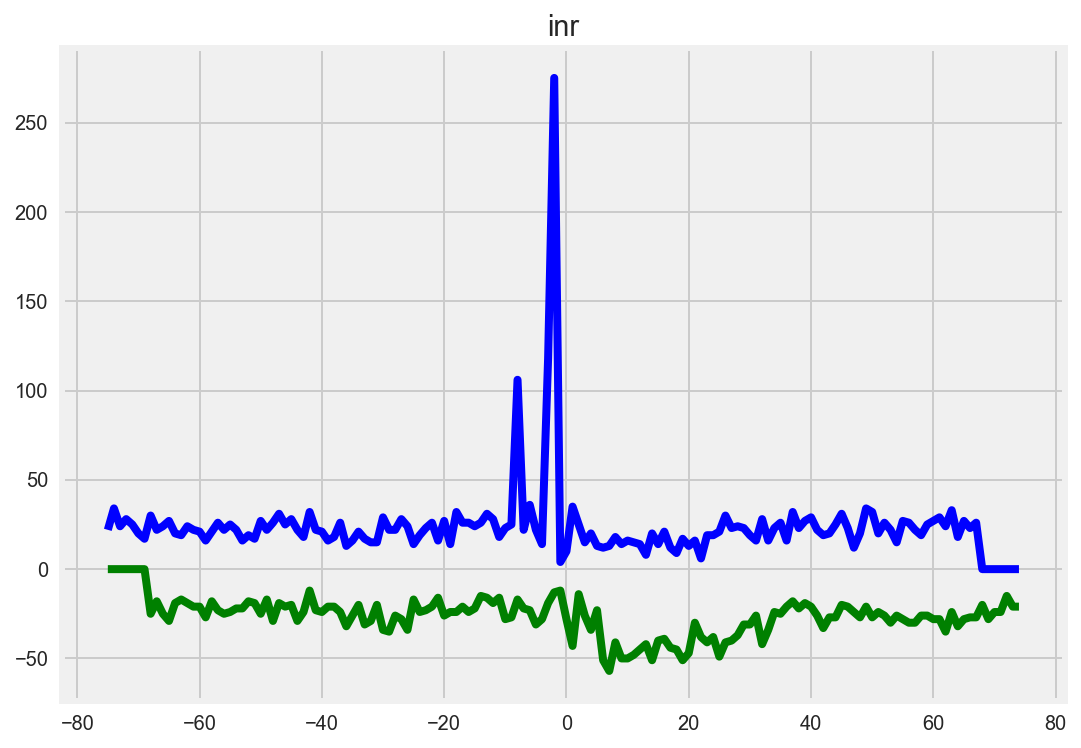

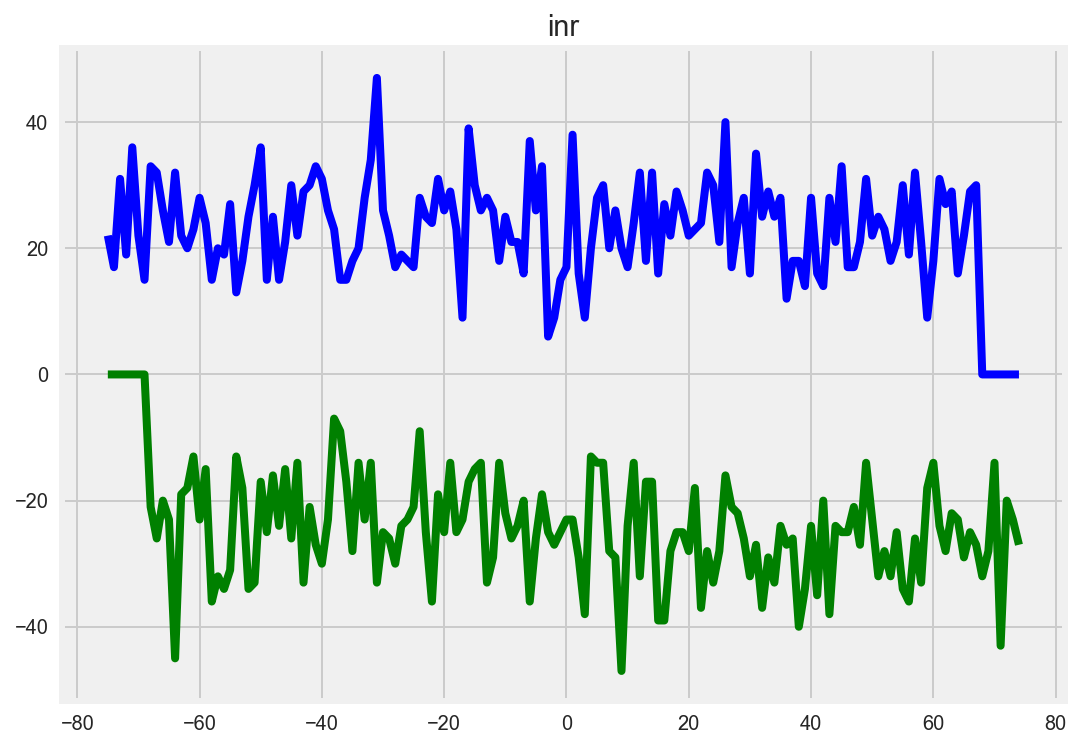

In [34]:
#motifs_list = glob.glob("Results/Figures/SuppFigure3/*instance.p")

#pfm_list = glob.glob(os.path.join(supp_f, "homer_motifs/*.pfm"))
pfm_path = os.path.join(supplemental, "homer_motifs")

#names_list = list(map(lambda x: x.split("instance")[1].replace("_",""), motifs_list))

motifs_list = ['Results/Figures/SuppFigure3/TSS_exp_instance_nonbinV2_inr_instance.p','Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_inr_instance.p']
names_list = ["inr","inr"]
print(names_list)
print(motifs_list)

#peaks_df = pd.read_csv("Results/output/TSS1.exp.bed",sep="\t",index_col=0)

wrap_motifs(motifs_list,names_list,peaks_df,pfm_path)

# 5. Run for more motifs

In [37]:
glob.glob(os.path.join(motif_folder,"*pfm"))

['/data/isshamie/TSS/Analysis/supplemental/homer_motifs/pbx3.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/ap4.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/znf528.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/pax8.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/ere.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/e2f1.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/are.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/npas.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/ets-ebox.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/runx2.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/tbr1.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/mef2b.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/homer_motifs/nfatc1.motif.pfm',
 '/data/isshamie/TSS/Analysis/supplemental/h

In [ ]:
t = time.time()
motifs_of_interest = ['tata', 'sp1', 'ctcf']
fa_file = os.path.join(out_dir,"TSS1.exp.fa")

f_save = 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)
print(time.time()-t)

### Refseq

t = time.time()

fa_file = os.path.join(out_dir,"TSS1.exp_refseq_centered.fa")

f_save = 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin'
motif_analysis.all_motifs_of_interest_instance(motifs_of_interest,fa_file,
                                    motif_folder, f_save,
                                    lowmem=False)
print(time.time()-t)



0it [00:00, ?it/s]

3it [00:00, 27.34it/s]

tata




6it [00:00, 26.64it/s]

9it [00:00, 25.88it/s]

11it [00:00, 21.88it/s]

14it [00:00, 21.14it/s]

16it [00:00, 19.55it/s]

18it [00:00, 18.62it/s]

20it [00:00, 18.13it/s]

22it [00:01, 17.79it/s]

24it [00:01, 17.61it/s]

26it [00:01, 17.33it/s]

29it [00:01, 19.03it/s]

31it [00:01, 18.17it/s]

33it [00:01, 17.71it/s]

36it [00:01, 19.17it/s]

39it [00:01, 20.33it/s]

42it [00:02, 21.16it/s]

45it [00:02, 21.48it/s]

48it [00:02, 21.47it/s]

51it [00:02, 21.32it/s]

54it [00:02, 19.99it/s]

57it [00:02, 20.43it/s]

60it [00:02, 20.91it/s]

63it [00:03, 21.62it/s]

66it [00:03, 21.18it/s]

69it [00:03, 21.92it/s]


72it [00:03, 21.75it/s]

75it [00:03, 21.87it/s]

78it [00:03, 21.96it/s]

81it [00:03, 21.71it/s]

84it [00:04, 21.85it/s]

87it [00:04, 21.96it/s]

90it [00:04, 22.43it/s]

93it [00:04, 22.48it/s]

96it [00:04, 23.11it/s]

99it [00:04, 22.81it/s]

102it [00:04, 22.60it/s]

105it [00:04, 21.96it/s]

108it [00:05, 21.77it/s]

111it [00:05, 22.19it/s]

114it [00:05, 22.20i

1492it [01:09, 22.43it/s]

1495it [01:09, 22.33it/s]

1498it [01:09, 22.19it/s]

1501it [01:10, 21.11it/s]

1504it [01:10, 21.02it/s]

1507it [01:10, 21.33it/s]

1510it [01:10, 21.32it/s]

1513it [01:10, 19.52it/s]

1516it [01:10, 20.41it/s]

1519it [01:10, 21.22it/s]

1522it [01:11, 21.62it/s]

1525it [01:11, 21.76it/s]

1528it [01:11, 21.72it/s]

1531it [01:11, 21.75it/s]

1534it [01:11, 20.56it/s]

1537it [01:11, 21.00it/s]

1540it [01:11, 20.92it/s]

1543it [01:12, 21.22it/s]

1546it [01:12, 22.27it/s]

1549it [01:12, 22.38it/s]

1552it [01:12, 22.79it/s]

1555it [01:12, 22.17it/s]

1558it [01:12, 22.16it/s]

1561it [01:12, 22.12it/s]

1564it [01:12, 21.73it/s]

1567it [01:13, 21.89it/s]

1570it [01:13, 21.15it/s]

1573it [01:13, 21.72it/s]

1576it [01:13, 21.64it/s]

1579it [01:13, 20.55it/s]

1582it [01:13, 19.26it/s]

1585it [01:14, 20.04it/s]

1588it [01:14, 20.62it/s]

1591it [01:14, 21.82it/s]

1594it [01:14, 22.03it/s]

1597it [01:14, 22.27it/s]

1600it [01:14, 22.37it/s]

1

2975it [02:18, 21.63it/s]

2978it [02:18, 21.62it/s]

2981it [02:18, 21.67it/s]

2984it [02:19, 21.68it/s]

2987it [02:19, 21.84it/s]

2990it [02:19, 22.04it/s]

2993it [02:19, 20.48it/s]

2996it [02:19, 20.83it/s]

2999it [02:19, 21.16it/s]

3002it [02:19, 21.43it/s]

3005it [02:20, 22.50it/s]

3008it [02:20, 22.39it/s]

3011it [02:20, 22.12it/s]

3014it [02:20, 21.97it/s]

3017it [02:20, 22.72it/s]

3020it [02:20, 23.08it/s]

3023it [02:20, 22.73it/s]

3026it [02:21, 22.42it/s]

3029it [02:21, 22.80it/s]

3032it [02:21, 22.83it/s]

3035it [02:21, 22.68it/s]

3038it [02:21, 22.58it/s]

3041it [02:21, 22.39it/s]

3044it [02:21, 22.25it/s]

3047it [02:21, 22.28it/s]

3050it [02:22, 22.32it/s]

3053it [02:22, 22.47it/s]

3056it [02:22, 22.44it/s]

3059it [02:22, 22.42it/s]

3062it [02:22, 22.35it/s]

3065it [02:22, 22.28it/s]

3068it [02:22, 22.10it/s]

3071it [02:23, 22.99it/s]

3074it [02:23, 22.90it/s]

3077it [02:23, 21.77it/s]

3080it [02:23, 22.03it/s]

3083it [02:23, 22.02it/s]

3

4452it [03:27, 22.30it/s]

4455it [03:27, 20.22it/s]

4458it [03:27, 19.00it/s]

4460it [03:27, 18.36it/s]

4462it [03:27, 17.89it/s]

4464it [03:27, 17.63it/s]

4466it [03:27, 17.97it/s]

4469it [03:28, 19.03it/s]

4472it [03:28, 19.78it/s]

4475it [03:28, 20.93it/s]

4478it [03:28, 19.96it/s]

4481it [03:28, 20.48it/s]

4484it [03:28, 20.71it/s]

4487it [03:28, 21.02it/s]

4490it [03:29, 21.27it/s]

4493it [03:29, 19.89it/s]

4496it [03:29, 20.56it/s]

4499it [03:29, 20.87it/s]

4502it [03:29, 21.31it/s]

4505it [03:29, 19.73it/s]

4508it [03:29, 19.42it/s]

4511it [03:30, 20.19it/s]

4514it [03:30, 20.76it/s]

4517it [03:30, 21.88it/s]

4520it [03:30, 22.01it/s]

4523it [03:30, 22.29it/s]

4526it [03:30, 20.49it/s]

4529it [03:30, 20.89it/s]

4532it [03:31, 21.25it/s]

4535it [03:31, 21.43it/s]

4538it [03:31, 20.07it/s]

4541it [03:31, 20.61it/s]

4544it [03:31, 21.08it/s]

4547it [03:31, 21.59it/s]

4550it [03:31, 20.29it/s]

4553it [03:32, 20.81it/s]

4556it [03:32, 21.61it/s]

4

5923it [04:35, 23.60it/s]

5926it [04:35, 24.05it/s]

5929it [04:35, 24.42it/s]

5932it [04:35, 24.83it/s]

5935it [04:35, 23.67it/s]

5938it [04:36, 22.93it/s]

5941it [04:36, 21.37it/s]

5944it [04:36, 19.99it/s]

5947it [04:36, 20.67it/s]

5950it [04:36, 21.01it/s]

5953it [04:36, 21.36it/s]

5956it [04:36, 21.60it/s]

5959it [04:37, 21.79it/s]

5962it [04:37, 21.96it/s]

5965it [04:37, 22.08it/s]

5968it [04:37, 22.06it/s]

5971it [04:37, 21.21it/s]

5974it [04:37, 22.06it/s]

5977it [04:37, 20.83it/s]

5980it [04:38, 21.04it/s]

5983it [04:38, 21.30it/s]

5986it [04:38, 21.42it/s]

5989it [04:38, 22.02it/s]

5992it [04:38, 23.04it/s]

5995it [04:38, 21.31it/s]

5998it [04:38, 21.34it/s]

6001it [04:39, 21.37it/s]

6004it [04:39, 18.76it/s]

6007it [04:39, 19.62it/s]

6010it [04:39, 20.30it/s]

6013it [04:39, 20.76it/s]

6016it [04:39, 20.91it/s]

6019it [04:39, 20.98it/s]

6022it [04:40, 21.06it/s]

6025it [04:40, 21.18it/s]

6028it [04:40, 21.26it/s]

6031it [04:40, 21.18it/s]

6

7395it [05:44, 22.39it/s]

7398it [05:44, 22.36it/s]

7401it [05:44, 22.36it/s]

7404it [05:44, 22.39it/s]

7407it [05:44, 22.38it/s]

7410it [05:44, 22.35it/s]

7413it [05:44, 22.33it/s]

7416it [05:45, 22.31it/s]

7419it [05:45, 22.00it/s]

7422it [05:45, 21.97it/s]

7425it [05:45, 21.82it/s]

7428it [05:45, 20.96it/s]

7431it [05:45, 21.26it/s]

7434it [05:45, 21.35it/s]

7437it [05:46, 21.04it/s]

7440it [05:46, 21.43it/s]

7443it [05:46, 21.89it/s]

7446it [05:46, 21.98it/s]

7449it [05:46, 22.12it/s]

7452it [05:46, 22.20it/s]

7455it [05:46, 22.14it/s]

7458it [05:47, 22.21it/s]

7461it [05:47, 23.14it/s]

7464it [05:47, 23.34it/s]

7467it [05:47, 22.92it/s]

7470it [05:47, 22.77it/s]

7473it [05:47, 22.53it/s]

7476it [05:47, 22.39it/s]

7479it [05:47, 22.22it/s]

7482it [05:48, 22.11it/s]

7485it [05:48, 20.49it/s]

7488it [05:48, 21.00it/s]

7491it [05:48, 22.30it/s]

7494it [05:48, 23.07it/s]

7497it [05:48, 23.45it/s]

7500it [05:48, 23.13it/s]

7503it [05:48, 23.94it/s]

7

8873it [06:53, 21.64it/s]

8876it [06:53, 22.79it/s]

8879it [06:53, 22.33it/s]

8882it [06:53, 22.11it/s]

8885it [06:53, 21.81it/s]

8888it [06:53, 21.66it/s]

8891it [06:54, 22.27it/s]

8894it [06:54, 21.98it/s]

8897it [06:54, 21.86it/s]

8900it [06:54, 21.64it/s]

8903it [06:54, 21.60it/s]

8906it [06:54, 21.34it/s]

8909it [06:54, 20.85it/s]

8912it [06:55, 20.48it/s]

8915it [06:55, 20.73it/s]

8918it [06:55, 19.96it/s]

8921it [06:55, 20.26it/s]

8924it [06:55, 20.68it/s]

8927it [06:55, 20.86it/s]

8930it [06:55, 21.03it/s]

8933it [06:56, 21.15it/s]

8936it [06:56, 19.35it/s]

8939it [06:56, 19.98it/s]

8942it [06:56, 20.41it/s]

8945it [06:56, 20.80it/s]

8948it [06:56, 21.24it/s]

8951it [06:57, 20.38it/s]

8954it [06:57, 20.63it/s]

8957it [06:57, 20.86it/s]

8960it [06:57, 21.00it/s]

8963it [06:57, 21.13it/s]

8966it [06:57, 20.32it/s]

8969it [06:57, 20.72it/s]

8972it [06:58, 20.86it/s]

8975it [06:58, 20.97it/s]

8978it [06:58, 21.21it/s]

8981it [06:58, 21.24it/s]

8

10339it [08:01, 20.56it/s]

10342it [08:01, 21.21it/s]

10345it [08:01, 21.39it/s]

10348it [08:01, 20.94it/s]

10351it [08:01, 21.08it/s]

10354it [08:01, 21.96it/s]

10357it [08:01, 21.75it/s]

10360it [08:02, 21.68it/s]

10363it [08:02, 21.60it/s]

10366it [08:02, 21.99it/s]

10369it [08:02, 21.86it/s]

10372it [08:02, 21.80it/s]

10375it [08:02, 21.80it/s]

10378it [08:02, 22.04it/s]

10381it [08:02, 21.99it/s]

10384it [08:03, 22.65it/s]

10387it [08:03, 23.69it/s]

10390it [08:03, 22.08it/s]

10393it [08:03, 22.08it/s]

10396it [08:03, 22.00it/s]

10399it [08:03, 21.96it/s]

10402it [08:03, 22.00it/s]

10405it [08:04, 21.95it/s]

10408it [08:04, 21.96it/s]

10411it [08:04, 21.96it/s]

10414it [08:04, 22.17it/s]

10417it [08:04, 22.00it/s]

10420it [08:04, 21.77it/s]

10423it [08:04, 20.01it/s]

10426it [08:05, 20.53it/s]

10429it [08:05, 19.96it/s]

10432it [08:05, 20.20it/s]

10435it [08:05, 20.23it/s]

10438it [08:05, 21.26it/s]

10441it [08:05, 22.36it/s]

10444it [08:05, 23.3

11057it [08:34, 21.52it/s]

11060it [08:34, 20.23it/s]

11063it [08:34, 20.72it/s]

11066it [08:35, 20.35it/s]

11069it [08:35, 20.63it/s]

11072it [08:35, 21.07it/s]

11075it [08:35, 22.25it/s]

11078it [08:35, 22.77it/s]

11081it [08:35, 22.51it/s]

11084it [08:35, 22.30it/s]

11087it [08:36, 22.09it/s]

11090it [08:36, 22.00it/s]

11093it [08:36, 21.86it/s]

11096it [08:36, 22.17it/s]

11099it [08:36, 22.12it/s]

11102it [08:36, 22.10it/s]

11105it [08:36, 22.01it/s]

11108it [08:36, 21.96it/s]

11111it [08:37, 21.71it/s]

11114it [08:37, 21.54it/s]

11117it [08:37, 21.50it/s]

11120it [08:37, 20.18it/s]

11123it [08:37, 20.76it/s]

11126it [08:37, 21.09it/s]

11129it [08:37, 21.15it/s]

11132it [08:38, 21.87it/s]

11135it [08:38, 21.72it/s]

11138it [08:38, 21.79it/s]

11141it [08:38, 22.00it/s]

11144it [08:38, 21.61it/s]

11147it [08:38, 21.61it/s]

11150it [08:38, 22.51it/s]

11153it [08:39, 22.73it/s]

11156it [08:39, 22.39it/s]

11159it [08:39, 22.25it/s]

11162it [08:39, 22.0

11780it [09:08, 22.47it/s]

11783it [09:08, 22.69it/s]

11786it [09:08, 23.23it/s]

11789it [09:08, 21.61it/s]

11792it [09:08, 20.16it/s]

11795it [09:08, 20.78it/s]

11798it [09:08, 21.83it/s]

11802it [09:08, 23.49it/s]

11805it [09:09, 22.88it/s]

11808it [09:09, 22.45it/s]

11811it [09:09, 22.28it/s]

11814it [09:09, 22.14it/s]

11817it [09:09, 21.96it/s]

11820it [09:09, 21.89it/s]

11823it [09:09, 21.90it/s]

11826it [09:10, 21.89it/s]

11829it [09:10, 21.67it/s]

11832it [09:10, 21.52it/s]

11835it [09:10, 20.68it/s]

11838it [09:10, 21.07it/s]

11841it [09:10, 21.33it/s]

11844it [09:10, 21.59it/s]

11847it [09:11, 21.61it/s]

11850it [09:11, 21.79it/s]

11853it [09:11, 21.70it/s]

11856it [09:11, 21.82it/s]

11859it [09:11, 22.52it/s]

11862it [09:11, 22.18it/s]

11865it [09:11, 21.91it/s]

11868it [09:12, 21.78it/s]

11871it [09:12, 21.69it/s]

11874it [09:12, 21.54it/s]

11877it [09:12, 21.54it/s]

11880it [09:12, 21.49it/s]

11883it [09:12, 21.50it/s]

11886it [09:12, 21.4

12489it [09:41, 21.06it/s]

12492it [09:41, 21.14it/s]

12495it [09:41, 21.21it/s]

12498it [09:41, 21.42it/s]

12501it [09:41, 20.38it/s]

12504it [09:42, 20.73it/s]

12507it [09:42, 21.67it/s]

12510it [09:42, 22.70it/s]

12513it [09:42, 21.79it/s]

12516it [09:42, 21.61it/s]

12519it [09:42, 22.33it/s]

12522it [09:42, 23.38it/s]

12525it [09:43, 22.87it/s]

12528it [09:43, 22.44it/s]

12531it [09:43, 22.17it/s]

12534it [09:43, 21.92it/s]

12537it [09:43, 21.25it/s]

12540it [09:43, 21.24it/s]

12543it [09:43, 21.57it/s]

12546it [09:44, 21.60it/s]

12549it [09:44, 21.74it/s]

12552it [09:44, 21.86it/s]

12555it [09:44, 20.42it/s]

12558it [09:44, 20.06it/s]

12561it [09:44, 19.64it/s]

12563it [09:44, 18.65it/s]

12566it [09:45, 19.67it/s]

12569it [09:45, 20.22it/s]

12572it [09:45, 19.43it/s]

12575it [09:45, 20.40it/s]

12578it [09:45, 20.69it/s]

12581it [09:45, 21.62it/s]

12584it [09:45, 21.48it/s]

12587it [09:45, 21.38it/s]

12590it [09:46, 21.40it/s]

12593it [09:46, 21.4

13205it [10:14, 20.83it/s]

13208it [10:14, 21.78it/s]

13211it [10:14, 21.91it/s]

13214it [10:14, 22.00it/s]

13217it [10:14, 21.92it/s]

13220it [10:15, 22.49it/s]

13223it [10:15, 23.40it/s]

13226it [10:15, 24.41it/s]

13229it [10:15, 23.62it/s]

13232it [10:15, 22.86it/s]

13235it [10:15, 22.79it/s]

13238it [10:15, 22.40it/s]

13241it [10:15, 20.90it/s]

13244it [10:16, 21.66it/s]

13247it [10:16, 21.80it/s]

13250it [10:16, 21.91it/s]

13253it [10:16, 21.55it/s]

13256it [10:16, 20.94it/s]

13259it [10:16, 21.17it/s]

13262it [10:16, 21.36it/s]

13265it [10:17, 21.63it/s]

13268it [10:17, 20.81it/s]

13271it [10:17, 21.28it/s]

13274it [10:17, 19.46it/s]

13277it [10:17, 20.20it/s]

13280it [10:17, 20.85it/s]

13283it [10:17, 21.24it/s]

13286it [10:18, 21.56it/s]

13289it [10:18, 21.75it/s]

13292it [10:18, 21.79it/s]

13295it [10:18, 21.46it/s]

13298it [10:18, 20.20it/s]

13301it [10:18, 20.52it/s]

13304it [10:18, 21.00it/s]

13307it [10:19, 21.53it/s]

13310it [10:19, 21.7

13927it [10:48, 21.65it/s]

13930it [10:48, 19.88it/s]

13933it [10:48, 18.62it/s]

13935it [10:48, 17.81it/s]

13937it [10:48, 17.80it/s]

13939it [10:48, 17.29it/s]

13941it [10:48, 17.18it/s]

13944it [10:49, 18.83it/s]

13947it [10:49, 20.06it/s]

13950it [10:49, 18.75it/s]

13952it [10:49, 17.73it/s]

13954it [10:49, 16.99it/s]

13956it [10:49, 17.29it/s]

13959it [10:49, 18.54it/s]

13962it [10:50, 19.47it/s]

13965it [10:50, 20.19it/s]

13968it [10:50, 20.75it/s]

13971it [10:50, 21.14it/s]

13974it [10:50, 21.45it/s]

13977it [10:50, 20.63it/s]

13980it [10:50, 20.86it/s]

13983it [10:51, 20.59it/s]

13986it [10:51, 21.15it/s]

13989it [10:51, 21.48it/s]

13992it [10:51, 22.57it/s]

13995it [10:51, 21.01it/s]

13998it [10:51, 20.54it/s]

14001it [10:51, 21.07it/s]

14004it [10:51, 22.12it/s]

14007it [10:52, 20.44it/s]

14010it [10:52, 20.74it/s]

14013it [10:52, 21.12it/s]

14016it [10:52, 20.30it/s]

14019it [10:52, 20.23it/s]

14022it [10:52, 21.17it/s]

14025it [10:52, 21.3

14627it [11:21, 22.14it/s]

14630it [11:21, 21.83it/s]

14633it [11:21, 21.21it/s]

14636it [11:22, 22.06it/s]

14639it [11:22, 21.98it/s]

14642it [11:22, 22.02it/s]

14645it [11:22, 22.06it/s]

14648it [11:22, 22.47it/s]

14651it [11:22, 22.36it/s]

14654it [11:22, 22.20it/s]

14657it [11:23, 22.08it/s]

14660it [11:23, 22.14it/s]

14663it [11:23, 22.08it/s]

14666it [11:23, 22.29it/s]

14669it [11:23, 22.27it/s]

14672it [11:23, 22.18it/s]

14675it [11:23, 22.15it/s]

14678it [11:23, 22.07it/s]

14681it [11:24, 22.19it/s]

14684it [11:24, 22.10it/s]

14687it [11:24, 22.33it/s]

14690it [11:24, 21.76it/s]

14693it [11:24, 21.90it/s]

14696it [11:24, 21.90it/s]

14699it [11:24, 21.94it/s]

14702it [11:25, 22.00it/s]

14705it [11:25, 22.49it/s]

14708it [11:25, 22.39it/s]

14711it [11:25, 22.24it/s]

14714it [11:25, 22.43it/s]

14717it [11:25, 22.43it/s]

14720it [11:25, 22.27it/s]

14723it [11:26, 21.20it/s]

14726it [11:26, 21.37it/s]

14729it [11:26, 21.44it/s]

14732it [11:26, 21.5

15350it [11:54, 22.79it/s]

15353it [11:54, 23.70it/s]

15356it [11:54, 23.16it/s]

15359it [11:54, 22.91it/s]

15362it [11:54, 22.70it/s]

15365it [11:55, 20.85it/s]

15368it [11:55, 21.31it/s]

15371it [11:55, 22.15it/s]

15374it [11:55, 23.34it/s]

15377it [11:55, 23.43it/s]

15380it [11:55, 24.17it/s]

15383it [11:55, 23.53it/s]

15386it [11:55, 22.87it/s]

15389it [11:56, 22.95it/s]

15392it [11:56, 23.48it/s]

15395it [11:56, 22.98it/s]

15398it [11:56, 23.10it/s]

15401it [11:56, 22.70it/s]

15404it [11:56, 22.13it/s]

15407it [11:56, 21.83it/s]

15410it [11:57, 21.66it/s]

15413it [11:57, 22.41it/s]

15416it [11:57, 22.42it/s]

15419it [11:57, 23.26it/s]

15422it [11:57, 22.76it/s]

15425it [11:57, 22.47it/s]

15428it [11:57, 22.26it/s]

15431it [11:57, 22.09it/s]

15434it [11:58, 22.00it/s]

15437it [11:58, 21.78it/s]

15440it [11:58, 21.86it/s]

15443it [11:58, 22.80it/s]

15446it [11:58, 22.23it/s]

15449it [11:58, 22.87it/s]

15452it [11:58, 22.63it/s]

15455it [11:59, 20.7

16070it [12:27, 22.44it/s]

16073it [12:27, 22.25it/s]

16076it [12:27, 22.12it/s]

16079it [12:27, 22.15it/s]

16082it [12:27, 23.00it/s]

16085it [12:27, 23.87it/s]

16088it [12:27, 23.46it/s]

16091it [12:28, 22.94it/s]

16094it [12:28, 22.47it/s]

16097it [12:28, 22.33it/s]

16100it [12:28, 22.17it/s]

16103it [12:28, 22.03it/s]

16106it [12:28, 21.67it/s]

16109it [12:29, 19.84it/s]

16112it [12:29, 20.13it/s]

16115it [12:29, 20.56it/s]

16118it [12:29, 20.72it/s]

16121it [12:29, 21.81it/s]

16124it [12:29, 21.90it/s]

16127it [12:29, 21.66it/s]

16130it [12:29, 21.59it/s]

16133it [12:30, 21.44it/s]

16136it [12:30, 21.41it/s]

16139it [12:30, 21.41it/s]

16142it [12:30, 21.31it/s]

16145it [12:30, 21.40it/s]

16148it [12:30, 22.20it/s]

16151it [12:30, 22.47it/s]

16154it [12:31, 22.31it/s]

16157it [12:31, 22.07it/s]

16160it [12:31, 22.18it/s]

16163it [12:31, 21.53it/s]

16166it [12:31, 21.53it/s]

16169it [12:31, 21.60it/s]

16172it [12:31, 21.60it/s]

16175it [12:32, 22.4

16792it [12:59, 22.72it/s]

16795it [13:00, 22.92it/s]

16798it [13:00, 22.65it/s]

16801it [13:00, 22.41it/s]

16804it [13:00, 22.58it/s]

16807it [13:00, 22.54it/s]

16810it [13:00, 22.87it/s]

16813it [13:00, 22.62it/s]

16816it [13:01, 22.55it/s]

16819it [13:01, 22.39it/s]

16822it [13:01, 23.23it/s]

16825it [13:01, 22.84it/s]

16828it [13:01, 22.59it/s]

16831it [13:01, 22.36it/s]

16834it [13:01, 22.25it/s]

16837it [13:01, 22.21it/s]

16840it [13:02, 22.10it/s]

16843it [13:02, 22.08it/s]

16846it [13:02, 22.09it/s]

16849it [13:02, 21.85it/s]

16852it [13:02, 21.82it/s]

16855it [13:02, 21.79it/s]

16858it [13:02, 21.75it/s]

16861it [13:03, 21.71it/s]

16864it [13:03, 21.71it/s]

16867it [13:03, 21.66it/s]

16870it [13:03, 21.54it/s]

16873it [13:03, 21.68it/s]

16876it [13:03, 20.47it/s]

16879it [13:03, 20.93it/s]

16882it [13:04, 21.30it/s]

16885it [13:04, 21.54it/s]

16888it [13:04, 21.65it/s]

16891it [13:04, 21.67it/s]

16894it [13:04, 21.82it/s]

16897it [13:04, 21.7

17513it [13:33, 22.88it/s]

17516it [13:33, 22.71it/s]

17519it [13:33, 22.69it/s]

17522it [13:33, 22.73it/s]

17525it [13:33, 22.50it/s]

17528it [13:33, 22.33it/s]

17531it [13:33, 21.97it/s]

17534it [13:34, 21.64it/s]

17537it [13:34, 21.60it/s]

17540it [13:34, 21.59it/s]

17543it [13:34, 21.36it/s]

17546it [13:34, 21.19it/s]

17549it [13:34, 21.19it/s]

17552it [13:34, 21.34it/s]

17555it [13:35, 21.31it/s]

17558it [13:35, 21.56it/s]

17561it [13:35, 21.64it/s]

17564it [13:35, 21.74it/s]

17567it [13:35, 21.46it/s]

17570it [13:35, 21.50it/s]

17573it [13:35, 21.33it/s]

17576it [13:36, 21.66it/s]

17579it [13:36, 21.58it/s]

17582it [13:36, 21.63it/s]

17585it [13:36, 21.35it/s]

17588it [13:36, 22.15it/s]

17591it [13:36, 22.01it/s]

17594it [13:36, 20.82it/s]

17597it [13:37, 21.09it/s]

17600it [13:37, 21.53it/s]

17603it [13:37, 22.47it/s]

17606it [13:37, 22.51it/s]

17609it [13:37, 22.28it/s]

17612it [13:37, 22.95it/s]

17615it [13:37, 22.99it/s]

17618it [13:37, 22.8

18235it [14:05, 22.67it/s]

18238it [14:06, 22.35it/s]

18241it [14:06, 22.17it/s]

18244it [14:06, 22.09it/s]

18247it [14:06, 22.06it/s]

18250it [14:06, 21.89it/s]

18253it [14:06, 21.92it/s]

18256it [14:06, 21.98it/s]

18259it [14:07, 21.95it/s]

18262it [14:07, 22.15it/s]

18265it [14:07, 21.86it/s]

18268it [14:07, 21.68it/s]

18271it [14:07, 21.42it/s]

18274it [14:07, 21.44it/s]

18277it [14:07, 21.46it/s]

18280it [14:08, 21.60it/s]

18283it [14:08, 21.65it/s]

18286it [14:08, 22.43it/s]

18289it [14:08, 22.04it/s]

18292it [14:08, 21.67it/s]

18295it [14:08, 21.71it/s]

18298it [14:08, 22.07it/s]

18301it [14:08, 22.39it/s]

18304it [14:09, 22.34it/s]

18307it [14:09, 22.27it/s]

18310it [14:09, 22.28it/s]

18313it [14:09, 21.37it/s]

18316it [14:09, 21.49it/s]

18319it [14:09, 21.49it/s]

18322it [14:09, 21.61it/s]

18325it [14:10, 21.82it/s]

18328it [14:10, 21.69it/s]

18331it [14:10, 22.52it/s]

18334it [14:10, 22.36it/s]

18337it [14:10, 22.54it/s]

18340it [14:10, 22.6

18951it [14:38, 20.74it/s]

18954it [14:39, 21.11it/s]

18957it [14:39, 21.43it/s]

18960it [14:39, 22.29it/s]

18963it [14:39, 21.78it/s]

18966it [14:39, 20.82it/s]

18969it [14:39, 20.85it/s]

18972it [14:39, 21.08it/s]

18975it [14:40, 21.19it/s]

18978it [14:40, 20.85it/s]

18981it [14:40, 21.02it/s]

18984it [14:40, 21.39it/s]

18987it [14:40, 21.61it/s]

18990it [14:40, 21.30it/s]

18993it [14:40, 21.46it/s]

18996it [14:41, 21.63it/s]

18999it [14:41, 21.87it/s]

19002it [14:41, 20.52it/s]

19005it [14:41, 21.25it/s]

19008it [14:41, 21.40it/s]

19011it [14:41, 20.94it/s]

19014it [14:41, 19.11it/s]

19017it [14:42, 20.63it/s]

19020it [14:42, 19.94it/s]

19023it [14:42, 19.73it/s]

19026it [14:42, 20.28it/s]

19029it [14:42, 20.24it/s]

19032it [14:42, 18.45it/s]

19034it [14:42, 18.18it/s]

19037it [14:43, 19.21it/s]

19040it [14:43, 20.83it/s]

19043it [14:43, 19.19it/s]

19046it [14:43, 20.16it/s]

19049it [14:43, 19.80it/s]

19052it [14:43, 20.41it/s]

19055it [14:43, 20.8

19652it [15:12, 22.31it/s]

19655it [15:12, 22.48it/s]

19658it [15:12, 22.21it/s]

19661it [15:12, 21.90it/s]

19664it [15:13, 21.73it/s]

19667it [15:13, 21.25it/s]

19670it [15:13, 21.49it/s]

19673it [15:13, 21.74it/s]

19676it [15:13, 21.91it/s]

19679it [15:13, 21.42it/s]

19682it [15:13, 21.69it/s]

19685it [15:14, 21.59it/s]

19688it [15:14, 21.70it/s]

19691it [15:14, 21.69it/s]

19694it [15:14, 21.79it/s]

19697it [15:14, 21.92it/s]

19700it [15:14, 21.98it/s]

19703it [15:14, 22.01it/s]

19706it [15:14, 22.03it/s]

19709it [15:15, 21.87it/s]

19712it [15:15, 22.74it/s]

19715it [15:15, 22.56it/s]

19718it [15:15, 22.24it/s]

19721it [15:15, 22.88it/s]

19724it [15:15, 22.60it/s]

19727it [15:15, 22.69it/s]

19730it [15:16, 23.54it/s]

19733it [15:16, 23.36it/s]

19736it [15:16, 21.47it/s]

19739it [15:16, 21.19it/s]

19742it [15:16, 21.42it/s]

19745it [15:16, 21.22it/s]

19748it [15:16, 21.35it/s]

19751it [15:17, 20.78it/s]

19754it [15:17, 21.15it/s]

19757it [15:17, 21.3

20363it [15:45, 22.48it/s]

20366it [15:45, 22.21it/s]

20369it [15:45, 22.14it/s]

20372it [15:46, 22.00it/s]

20375it [15:46, 22.32it/s]

20378it [15:46, 22.18it/s]

20381it [15:46, 21.90it/s]

20384it [15:46, 21.88it/s]

20387it [15:46, 22.02it/s]

20390it [15:46, 22.03it/s]

20393it [15:46, 21.89it/s]

20396it [15:47, 21.77it/s]

20399it [15:47, 21.77it/s]

20402it [15:47, 22.67it/s]

20405it [15:47, 22.66it/s]

20408it [15:47, 22.49it/s]

20411it [15:47, 22.36it/s]

20414it [15:47, 22.20it/s]

20417it [15:48, 22.19it/s]

20420it [15:48, 21.64it/s]

20423it [15:48, 20.25it/s]

20426it [15:48, 20.69it/s]

20429it [15:48, 20.99it/s]

20432it [15:48, 19.28it/s]

20434it [15:48, 18.28it/s]

20437it [15:49, 19.44it/s]

20440it [15:49, 20.06it/s]

20443it [15:49, 20.92it/s]

20446it [15:49, 21.91it/s]

20449it [15:49, 22.67it/s]

20452it [15:49, 22.40it/s]

20455it [15:49, 22.32it/s]

20458it [15:49, 22.41it/s]

20461it [15:50, 22.50it/s]

20464it [15:50, 22.21it/s]

20467it [15:50, 22.0

21083it [16:18, 22.56it/s]

21086it [16:18, 22.38it/s]

21089it [16:18, 22.29it/s]

21092it [16:18, 22.08it/s]

21095it [16:18, 21.77it/s]

21098it [16:19, 21.77it/s]

21101it [16:19, 22.14it/s]

21104it [16:19, 21.61it/s]

21107it [16:19, 21.38it/s]

21110it [16:19, 21.18it/s]

21113it [16:19, 21.55it/s]

21116it [16:19, 22.33it/s]

21119it [16:19, 22.78it/s]

21122it [16:20, 22.98it/s]

21125it [16:20, 22.70it/s]

21128it [16:20, 22.45it/s]

21131it [16:20, 22.72it/s]

21134it [16:20, 22.90it/s]

21137it [16:20, 22.63it/s]

21140it [16:20, 22.36it/s]

21143it [16:21, 22.68it/s]

21146it [16:21, 22.04it/s]

21149it [16:21, 21.18it/s]

21152it [16:21, 20.96it/s]

21155it [16:21, 21.25it/s]

21158it [16:21, 21.29it/s]

21161it [16:21, 20.16it/s]

21164it [16:22, 20.09it/s]

21167it [16:22, 18.92it/s]

21170it [16:22, 19.75it/s]

21173it [16:22, 20.25it/s]

21176it [16:22, 19.97it/s]

21179it [16:22, 20.17it/s]

21182it [16:22, 20.62it/s]

21185it [16:23, 20.92it/s]

21188it [16:23, 21.1

21801it [16:51, 21.65it/s]

21804it [16:51, 22.61it/s]

21807it [16:51, 23.42it/s]

21810it [16:51, 22.92it/s]

21813it [16:52, 22.52it/s]

21816it [16:52, 22.25it/s]

21819it [16:52, 22.25it/s]

21822it [16:52, 22.10it/s]

21825it [16:52, 22.05it/s]

21828it [16:52, 22.83it/s]

21831it [16:52, 22.76it/s]

21834it [16:52, 22.26it/s]

21837it [16:53, 22.12it/s]

21840it [16:53, 21.90it/s]

21843it [16:53, 21.93it/s]

21846it [16:53, 22.04it/s]

21849it [16:53, 21.95it/s]

21852it [16:53, 21.84it/s]

21855it [16:53, 22.39it/s]

21858it [16:54, 22.17it/s]

21861it [16:54, 22.06it/s]

21864it [16:54, 22.30it/s]

21867it [16:54, 22.69it/s]

21870it [16:54, 22.47it/s]

21873it [16:54, 22.37it/s]

21876it [16:54, 22.26it/s]

21879it [16:55, 21.75it/s]

21882it [16:55, 22.57it/s]

21885it [16:55, 22.35it/s]

21888it [16:55, 23.17it/s]

21891it [16:55, 22.54it/s]

21894it [16:55, 22.25it/s]

21897it [16:55, 21.56it/s]

21900it [16:55, 21.09it/s]

21903it [16:56, 21.37it/s]

21906it [16:56, 22.4

22537it [17:23, 22.34it/s]

22540it [17:24, 22.04it/s]

22543it [17:24, 22.15it/s]

22546it [17:24, 21.84it/s]

22549it [17:24, 21.90it/s]

22552it [17:24, 21.69it/s]

22555it [17:24, 21.50it/s]

22558it [17:24, 20.68it/s]

22561it [17:25, 21.35it/s]

22564it [17:25, 21.51it/s]

22567it [17:25, 21.52it/s]

22570it [17:25, 21.67it/s]

22573it [17:25, 21.98it/s]

22576it [17:25, 21.92it/s]

22579it [17:25, 22.55it/s]

22582it [17:26, 22.68it/s]

22585it [17:26, 22.71it/s]

22588it [17:26, 22.51it/s]

22591it [17:26, 22.28it/s]

22594it [17:26, 22.12it/s]

22597it [17:26, 20.81it/s]

22600it [17:26, 20.94it/s]

22603it [17:27, 21.32it/s]

22606it [17:27, 21.50it/s]

22609it [17:27, 22.29it/s]

22612it [17:27, 22.15it/s]

22615it [17:27, 22.17it/s]

22618it [17:27, 22.02it/s]

22621it [17:27, 21.92it/s]

22624it [17:27, 21.87it/s]

22627it [17:28, 21.88it/s]

22630it [17:28, 22.09it/s]

22633it [17:28, 21.88it/s]

22636it [17:28, 21.73it/s]

22639it [17:28, 22.29it/s]

22642it [17:28, 22.0

23260it [17:56, 22.10it/s]

23263it [17:57, 23.04it/s]

23266it [17:57, 22.79it/s]

23269it [17:57, 22.59it/s]

23272it [17:57, 22.50it/s]

23275it [17:57, 22.56it/s]

23278it [17:57, 22.34it/s]

23281it [17:57, 22.31it/s]

23284it [17:58, 22.13it/s]

23287it [17:58, 22.08it/s]

23290it [17:58, 22.13it/s]

23293it [17:58, 22.16it/s]

23296it [17:58, 22.18it/s]

23299it [17:58, 23.03it/s]

23302it [17:58, 23.23it/s]

23305it [17:58, 22.91it/s]

23308it [17:59, 23.55it/s]

23311it [17:59, 23.60it/s]

23314it [17:59, 23.50it/s]

23317it [17:59, 23.06it/s]

23320it [17:59, 22.90it/s]

23323it [17:59, 23.34it/s]

23326it [17:59, 22.95it/s]

23329it [17:59, 22.54it/s]

23332it [18:00, 22.29it/s]

23335it [18:00, 22.25it/s]

23338it [18:00, 22.26it/s]

23341it [18:00, 22.61it/s]

23344it [18:00, 22.31it/s]

23347it [18:00, 22.09it/s]

23350it [18:00, 22.24it/s]

23353it [18:01, 21.58it/s]

23356it [18:01, 21.77it/s]

23359it [18:01, 22.27it/s]

23362it [18:01, 22.72it/s]

23365it [18:01, 22.4

23978it [18:30, 19.01it/s]

23980it [18:30, 18.21it/s]

23983it [18:30, 19.02it/s]

23986it [18:30, 19.64it/s]

23989it [18:30, 20.30it/s]

23992it [18:30, 20.70it/s]

23995it [18:31, 20.90it/s]

23998it [18:31, 20.90it/s]

24001it [18:31, 21.17it/s]

24004it [18:31, 21.35it/s]

24007it [18:31, 21.48it/s]

24010it [18:31, 21.57it/s]

24013it [18:31, 22.37it/s]

24016it [18:31, 22.51it/s]

24019it [18:32, 23.15it/s]

24022it [18:32, 21.86it/s]

24025it [18:32, 21.92it/s]

24028it [18:32, 21.84it/s]

24031it [18:32, 22.44it/s]

24034it [18:32, 21.18it/s]

24037it [18:32, 20.03it/s]

24040it [18:33, 20.55it/s]

24043it [18:33, 20.01it/s]

24046it [18:33, 20.59it/s]

24049it [18:33, 20.71it/s]

24052it [18:33, 21.86it/s]

24055it [18:33, 22.40it/s]

24058it [18:33, 20.64it/s]

24061it [18:34, 21.09it/s]

24064it [18:34, 21.21it/s]

24067it [18:34, 21.56it/s]

24070it [18:34, 21.88it/s]

24073it [18:34, 20.39it/s]

24076it [18:34, 20.77it/s]

24079it [18:34, 21.35it/s]

24082it [18:35, 21.5

24682it [19:03, 21.32it/s]

24685it [19:03, 21.55it/s]

24688it [19:03, 21.65it/s]

24691it [19:03, 21.80it/s]

24694it [19:03, 21.77it/s]

24697it [19:03, 22.06it/s]

24700it [19:04, 21.09it/s]

24703it [19:04, 21.27it/s]

24706it [19:04, 21.32it/s]

24709it [19:04, 20.06it/s]

24712it [19:04, 21.17it/s]

24715it [19:04, 21.86it/s]

24718it [19:04, 21.97it/s]

24721it [19:05, 22.04it/s]

24724it [19:05, 21.98it/s]

24727it [19:05, 21.68it/s]

24730it [19:05, 22.13it/s]

24733it [19:05, 20.00it/s]

24736it [19:05, 20.34it/s]

24739it [19:05, 20.69it/s]

24742it [19:06, 20.65it/s]

24745it [19:06, 20.99it/s]

24748it [19:06, 21.14it/s]

24751it [19:06, 21.29it/s]

24754it [19:06, 21.24it/s]

24757it [19:06, 21.53it/s]

24760it [19:06, 21.57it/s]

24763it [19:07, 21.62it/s]

24766it [19:07, 21.41it/s]

24769it [19:07, 20.72it/s]

24772it [19:07, 20.88it/s]

24775it [19:07, 21.07it/s]

24778it [19:07, 20.74it/s]

24781it [19:07, 21.08it/s]

24784it [19:08, 21.29it/s]

24787it [19:08, 21.8

25405it [19:36, 22.19it/s]

25408it [19:36, 20.49it/s]

25411it [19:36, 21.11it/s]

25414it [19:37, 21.53it/s]

25417it [19:37, 22.68it/s]

25420it [19:37, 22.55it/s]

25423it [19:37, 22.48it/s]

25426it [19:37, 22.65it/s]

25429it [19:37, 22.46it/s]

25432it [19:37, 22.32it/s]

25435it [19:37, 22.29it/s]

25438it [19:38, 22.49it/s]

25441it [19:38, 22.24it/s]

25444it [19:38, 22.09it/s]

25447it [19:38, 22.20it/s]

25450it [19:38, 22.14it/s]

25453it [19:38, 22.04it/s]

25456it [19:38, 22.07it/s]

25459it [19:39, 22.18it/s]

25462it [19:39, 22.16it/s]

25465it [19:39, 22.23it/s]

25468it [19:39, 22.18it/s]

25471it [19:39, 22.27it/s]

25474it [19:39, 22.21it/s]

25477it [19:39, 22.34it/s]

25480it [19:39, 22.62it/s]

25483it [19:40, 22.44it/s]

25486it [19:40, 22.26it/s]

25489it [19:40, 20.12it/s]

25492it [19:40, 19.57it/s]

25495it [19:40, 20.02it/s]

25498it [19:40, 18.98it/s]

25500it [19:41, 18.89it/s]

25502it [19:41, 18.82it/s]

25505it [19:41, 19.59it/s]

25508it [19:41, 20.0

26110it [20:10, 21.79it/s]

26113it [20:10, 21.87it/s]

26116it [20:10, 21.91it/s]

26119it [20:10, 21.76it/s]

26122it [20:10, 21.25it/s]

26125it [20:10, 21.42it/s]

26128it [20:10, 21.57it/s]

26131it [20:11, 21.62it/s]

26134it [20:11, 21.77it/s]

26137it [20:11, 21.90it/s]

26140it [20:11, 22.89it/s]

26143it [20:11, 22.90it/s]

26146it [20:11, 23.27it/s]

26149it [20:11, 22.98it/s]

26152it [20:11, 22.64it/s]

26155it [20:12, 22.46it/s]

26158it [20:12, 22.35it/s]

26161it [20:12, 22.60it/s]

26164it [20:12, 20.93it/s]

26167it [20:12, 21.16it/s]

26170it [20:12, 21.47it/s]

26173it [20:12, 22.43it/s]

26176it [20:13, 23.33it/s]

26179it [20:13, 23.07it/s]

26182it [20:13, 23.70it/s]

26185it [20:13, 21.30it/s]

26188it [20:13, 21.23it/s]

26191it [20:13, 19.09it/s]

26194it [20:13, 19.76it/s]

26197it [20:14, 20.16it/s]

26200it [20:14, 20.63it/s]

26203it [20:14, 20.95it/s]

26206it [20:14, 21.17it/s]

26209it [20:14, 19.13it/s]

26212it [20:14, 19.75it/s]

26215it [20:15, 19.0

26832it [20:43, 20.66it/s]

26835it [20:43, 20.91it/s]

26838it [20:43, 21.16it/s]

26841it [20:43, 21.33it/s]

26844it [20:44, 21.62it/s]

26847it [20:44, 21.26it/s]

26850it [20:44, 21.56it/s]

26853it [20:44, 21.74it/s]

26856it [20:44, 21.43it/s]

26859it [20:44, 20.53it/s]

26862it [20:44, 20.93it/s]

26865it [20:45, 21.10it/s]

26868it [20:45, 19.98it/s]

26871it [20:45, 20.39it/s]

26874it [20:45, 20.83it/s]

26877it [20:45, 21.20it/s]

26880it [20:45, 21.42it/s]

26883it [20:45, 21.50it/s]

26886it [20:46, 21.38it/s]

26889it [20:46, 21.41it/s]

26892it [20:46, 21.65it/s]

26895it [20:46, 21.83it/s]

26898it [20:46, 21.94it/s]

26901it [20:46, 22.73it/s]

26904it [20:46, 21.28it/s]

26907it [20:47, 21.43it/s]

26910it [20:47, 21.74it/s]

26913it [20:47, 21.80it/s]

26916it [20:47, 21.87it/s]

26919it [20:47, 21.95it/s]

26922it [20:47, 21.79it/s]

26925it [20:47, 22.28it/s]

26928it [20:48, 21.86it/s]

26931it [20:48, 21.65it/s]

26934it [20:48, 20.95it/s]

26937it [20:48, 21.1

27552it [21:16, 20.73it/s]

27555it [21:17, 19.91it/s]

27558it [21:17, 20.65it/s]

27561it [21:17, 19.26it/s]

27563it [21:17, 19.32it/s]

27566it [21:17, 20.25it/s]

27569it [21:17, 21.62it/s]

27572it [21:17, 22.90it/s]

27575it [21:18, 23.35it/s]

27578it [21:18, 22.78it/s]

27581it [21:18, 22.50it/s]

27584it [21:18, 22.34it/s]

27587it [21:18, 22.25it/s]

27590it [21:18, 22.11it/s]

27593it [21:18, 22.33it/s]

27596it [21:19, 20.32it/s]

27599it [21:19, 19.60it/s]

27602it [21:19, 20.14it/s]

27605it [21:19, 21.13it/s]

27608it [21:19, 21.31it/s]

27611it [21:19, 21.44it/s]

27614it [21:19, 21.62it/s]

27617it [21:20, 21.63it/s]

27620it [21:20, 21.63it/s]

27623it [21:20, 21.58it/s]

27626it [21:20, 21.63it/s]

27629it [21:20, 21.68it/s]

27632it [21:20, 21.48it/s]

27635it [21:20, 20.24it/s]

27638it [21:21, 21.28it/s]

27641it [21:21, 21.50it/s]

27644it [21:21, 21.62it/s]

27647it [21:21, 22.64it/s]

27650it [21:21, 22.40it/s]

27653it [21:21, 22.29it/s]

27656it [21:21, 20.6

28252it [21:50, 21.16it/s]

28255it [21:50, 20.33it/s]

28258it [21:50, 19.28it/s]

28261it [21:50, 20.01it/s]

28264it [21:51, 20.19it/s]

28267it [21:51, 21.22it/s]

28270it [21:51, 21.31it/s]

28273it [21:51, 21.42it/s]

28276it [21:51, 21.49it/s]

28279it [21:51, 21.44it/s]

28282it [21:51, 21.47it/s]

28285it [21:52, 21.69it/s]

28288it [21:52, 21.73it/s]

28291it [21:52, 21.77it/s]

28294it [21:52, 21.77it/s]

28297it [21:52, 21.80it/s]

28300it [21:52, 21.64it/s]

28303it [21:52, 22.44it/s]

28306it [21:52, 22.09it/s]

28309it [21:53, 21.59it/s]

28312it [21:53, 20.62it/s]

28315it [21:53, 21.07it/s]

28318it [21:53, 21.58it/s]

28321it [21:53, 21.01it/s]

28324it [21:53, 21.33it/s]

28327it [21:53, 21.42it/s]

28330it [21:54, 21.44it/s]

28333it [21:54, 21.18it/s]

28336it [21:54, 21.31it/s]

28339it [21:54, 21.22it/s]

28342it [21:54, 21.98it/s]

28345it [21:54, 21.95it/s]

28348it [21:54, 21.97it/s]

28351it [21:55, 21.93it/s]

28354it [21:55, 21.24it/s]

28357it [21:55, 20.0

28970it [22:23, 21.40it/s]

28973it [22:23, 21.46it/s]

28976it [22:24, 21.45it/s]

28979it [22:24, 21.39it/s]

28982it [22:24, 20.41it/s]

28985it [22:24, 20.82it/s]

28988it [22:24, 21.58it/s]

28991it [22:24, 21.68it/s]

28994it [22:24, 21.29it/s]

28997it [22:25, 21.40it/s]

29000it [22:25, 21.06it/s]

29003it [22:25, 20.08it/s]

29006it [22:25, 20.34it/s]

29009it [22:25, 20.78it/s]

29012it [22:25, 21.53it/s]

29015it [22:25, 21.57it/s]

29018it [22:26, 22.41it/s]

29021it [22:26, 22.15it/s]

29024it [22:26, 22.20it/s]

29027it [22:26, 22.06it/s]

29030it [22:26, 21.81it/s]

29033it [22:26, 21.68it/s]

29036it [22:26, 22.39it/s]

29039it [22:27, 22.21it/s]

29042it [22:27, 21.58it/s]

29045it [22:27, 21.24it/s]

29048it [22:27, 21.23it/s]

29051it [22:27, 21.21it/s]

29054it [22:27, 20.61it/s]

29057it [22:27, 20.42it/s]

29060it [22:28, 20.45it/s]

29063it [22:28, 20.69it/s]

29066it [22:28, 20.95it/s]

29069it [22:28, 20.28it/s]

29072it [22:28, 20.69it/s]

29075it [22:28, 20.9

29682it [22:57, 21.49it/s]

29685it [22:57, 19.65it/s]

29688it [22:57, 18.70it/s]

29690it [22:58, 18.91it/s]

29693it [22:58, 19.79it/s]

29696it [22:58, 20.50it/s]

29699it [22:58, 21.60it/s]

29702it [22:58, 21.78it/s]

29705it [22:58, 21.85it/s]

29708it [22:58, 21.92it/s]

29711it [22:59, 22.04it/s]

29714it [22:59, 22.02it/s]

29717it [22:59, 20.69it/s]

29720it [22:59, 21.08it/s]

29723it [22:59, 21.44it/s]

29726it [22:59, 21.19it/s]

29729it [22:59, 21.60it/s]

29732it [22:59, 22.79it/s]

29735it [23:00, 22.46it/s]

29738it [23:00, 22.44it/s]

29741it [23:00, 22.52it/s]

29744it [23:00, 22.04it/s]

29747it [23:00, 22.02it/s]

29750it [23:00, 21.82it/s]

29753it [23:00, 22.39it/s]

29756it [23:01, 23.19it/s]

29759it [23:01, 22.05it/s]

29762it [23:01, 21.17it/s]

29765it [23:01, 19.60it/s]

29768it [23:01, 20.21it/s]

29771it [23:01, 20.73it/s]

29774it [23:01, 20.99it/s]

29777it [23:02, 21.29it/s]

29780it [23:02, 21.56it/s]

29783it [23:02, 21.72it/s]

29786it [23:02, 21.5

30383it [23:30, 21.49it/s]

30386it [23:31, 21.64it/s]

30389it [23:31, 21.46it/s]

30392it [23:31, 21.52it/s]

30395it [23:31, 21.99it/s]

30398it [23:31, 22.39it/s]

30401it [23:31, 22.23it/s]

30404it [23:31, 21.41it/s]

30407it [23:32, 21.58it/s]

30410it [23:32, 22.43it/s]

30413it [23:32, 21.66it/s]

30416it [23:32, 21.53it/s]

30419it [23:32, 22.37it/s]

30422it [23:32, 22.11it/s]

30425it [23:32, 21.96it/s]

30428it [23:33, 21.98it/s]

30431it [23:33, 21.83it/s]

30434it [23:33, 21.81it/s]

30437it [23:33, 21.67it/s]

30440it [23:33, 21.35it/s]

30443it [23:33, 21.65it/s]

30446it [23:33, 21.72it/s]

30449it [23:33, 21.81it/s]

30452it [23:34, 21.78it/s]

30455it [23:34, 22.38it/s]

30458it [23:34, 22.18it/s]

30461it [23:34, 22.15it/s]

30464it [23:34, 22.60it/s]

30467it [23:34, 22.36it/s]

30470it [23:34, 22.14it/s]

30473it [23:35, 22.26it/s]

30476it [23:35, 20.05it/s]

30479it [23:35, 20.33it/s]

30482it [23:35, 20.54it/s]

30485it [23:35, 20.66it/s]

30488it [23:35, 20.3

31098it [24:04, 21.62it/s]

31101it [24:04, 21.90it/s]

31104it [24:04, 21.75it/s]

31107it [24:04, 21.77it/s]

31110it [24:04, 21.69it/s]

31113it [24:05, 21.55it/s]

31116it [24:05, 21.60it/s]

31119it [24:05, 21.61it/s]

31122it [24:05, 22.45it/s]

31125it [24:05, 22.70it/s]

31128it [24:05, 22.70it/s]

31131it [24:05, 21.48it/s]

31134it [24:06, 21.46it/s]

31137it [24:06, 21.93it/s]

31140it [24:06, 22.89it/s]

31143it [24:06, 23.85it/s]

31146it [24:06, 22.66it/s]

31149it [24:06, 22.32it/s]

31152it [24:06, 22.15it/s]

31155it [24:06, 22.24it/s]

31158it [24:07, 22.54it/s]

31161it [24:07, 23.45it/s]

31164it [24:07, 22.29it/s]

31167it [24:07, 22.09it/s]

31170it [24:07, 20.86it/s]

31173it [24:07, 20.98it/s]

31176it [24:07, 21.14it/s]

31179it [24:08, 20.51it/s]

31182it [24:08, 21.35it/s]

31185it [24:08, 21.36it/s]

31188it [24:08, 21.42it/s]

31191it [24:08, 21.37it/s]

31194it [24:08, 21.53it/s]

31197it [24:08, 21.25it/s]

31200it [24:09, 21.53it/s]

31203it [24:09, 21.2

31819it [24:37, 21.89it/s]

31822it [24:37, 21.79it/s]

31825it [24:37, 21.09it/s]

31828it [24:38, 21.72it/s]

31831it [24:38, 22.56it/s]

31834it [24:38, 23.39it/s]

31837it [24:38, 22.83it/s]

31840it [24:38, 22.64it/s]

31843it [24:38, 22.32it/s]

31846it [24:38, 22.45it/s]

31849it [24:38, 22.34it/s]

31852it [24:39, 22.14it/s]

31855it [24:39, 21.83it/s]

31858it [24:39, 21.48it/s]

31861it [24:39, 21.44it/s]

31864it [24:39, 21.81it/s]

31867it [24:39, 20.43it/s]

31870it [24:39, 20.56it/s]

31873it [24:40, 20.84it/s]

31876it [24:40, 20.93it/s]

31879it [24:40, 21.17it/s]

31882it [24:40, 21.35it/s]

31885it [24:40, 21.50it/s]

31888it [24:40, 21.57it/s]

31891it [24:40, 21.46it/s]

31894it [24:41, 21.48it/s]

31897it [24:41, 21.53it/s]

31900it [24:41, 20.20it/s]

31903it [24:41, 20.14it/s]

31906it [24:41, 20.59it/s]

31909it [24:41, 20.91it/s]

31912it [24:41, 19.84it/s]

31915it [24:42, 20.12it/s]

31918it [24:42, 20.30it/s]

31921it [24:42, 20.72it/s]

31924it [24:42, 21.0

32539it [25:11, 20.86it/s]

32542it [25:11, 21.20it/s]

32545it [25:11, 21.39it/s]

32548it [25:11, 21.60it/s]

32551it [25:11, 21.67it/s]

32554it [25:12, 21.74it/s]

32557it [25:12, 20.54it/s]

32560it [25:12, 20.76it/s]

32563it [25:12, 20.95it/s]

32566it [25:12, 20.24it/s]

32569it [25:12, 20.80it/s]

32572it [25:12, 21.95it/s]

32575it [25:13, 22.50it/s]

32578it [25:13, 22.26it/s]

32581it [25:13, 22.11it/s]

32584it [25:13, 22.20it/s]

32587it [25:13, 22.04it/s]

32590it [25:13, 20.68it/s]

32593it [25:13, 19.80it/s]

32596it [25:14, 20.46it/s]

32599it [25:14, 20.72it/s]

32602it [25:14, 20.98it/s]

32605it [25:14, 20.12it/s]

32608it [25:14, 20.50it/s]

32611it [25:14, 19.58it/s]

32614it [25:15, 20.25it/s]

32617it [25:15, 20.77it/s]

32620it [25:15, 20.97it/s]

32623it [25:15, 19.74it/s]

32626it [25:15, 20.38it/s]

32629it [25:15, 20.41it/s]

32632it [25:15, 21.04it/s]

32635it [25:16, 19.82it/s]

32638it [25:16, 20.27it/s]

32641it [25:16, 20.77it/s]

32644it [25:16, 21.0

33259it [25:44, 22.06it/s]

33262it [25:45, 21.90it/s]

33265it [25:45, 21.68it/s]

33268it [25:45, 21.75it/s]

33271it [25:45, 21.61it/s]

33274it [25:45, 21.51it/s]

33277it [25:45, 21.42it/s]

33280it [25:45, 21.51it/s]

33283it [25:46, 21.41it/s]

33286it [25:46, 21.08it/s]

33289it [25:46, 21.33it/s]

33292it [25:46, 21.52it/s]

33295it [25:46, 20.85it/s]

33298it [25:46, 19.43it/s]

33300it [25:46, 18.37it/s]

33302it [25:47, 17.74it/s]

33304it [25:47, 18.04it/s]

33306it [25:47, 17.53it/s]

33309it [25:47, 17.87it/s]

33311it [25:47, 17.32it/s]

33313it [25:47, 17.04it/s]

33315it [25:47, 17.34it/s]

33318it [25:47, 18.39it/s]

33321it [25:48, 19.31it/s]

33324it [25:48, 20.77it/s]

33327it [25:48, 21.26it/s]

33330it [25:48, 21.54it/s]

33333it [25:48, 21.85it/s]

33336it [25:48, 21.83it/s]

33339it [25:48, 21.66it/s]

33342it [25:49, 20.33it/s]

33345it [25:49, 20.02it/s]

33348it [25:49, 20.18it/s]

33351it [25:49, 20.76it/s]

33354it [25:49, 19.74it/s]

33356it [25:49, 18.9

33936it [26:17, 22.57it/s]

33939it [26:18, 23.11it/s]

33942it [26:18, 22.94it/s]

33945it [26:18, 22.42it/s]

33948it [26:18, 22.13it/s]

33951it [26:18, 21.93it/s]

33954it [26:18, 21.73it/s]

33957it [26:18, 21.60it/s]

33960it [26:19, 21.93it/s]

33963it [26:19, 22.19it/s]

33966it [26:19, 22.05it/s]

33969it [26:19, 22.07it/s]

33972it [26:19, 22.02it/s]

33975it [26:19, 21.88it/s]

33978it [26:19, 21.80it/s]

33981it [26:20, 21.68it/s]

33984it [26:20, 21.61it/s]

33987it [26:20, 21.65it/s]

33990it [26:20, 20.47it/s]

33993it [26:20, 20.90it/s]

33996it [26:20, 21.76it/s]

33999it [26:20, 21.91it/s]

34002it [26:20, 22.83it/s]

34005it [26:21, 23.48it/s]

34008it [26:21, 23.03it/s]

34011it [26:21, 22.66it/s]

34014it [26:21, 22.51it/s]

34017it [26:21, 22.67it/s]

34020it [26:21, 21.43it/s]

34023it [26:21, 21.69it/s]

34026it [26:22, 21.91it/s]

34029it [26:22, 22.07it/s]

34032it [26:22, 22.12it/s]

34035it [26:22, 21.96it/s]

34038it [26:22, 21.78it/s]

34041it [26:22, 21.9

34658it [26:51, 19.94it/s]

34661it [26:51, 20.93it/s]

34664it [26:51, 21.24it/s]

34667it [26:52, 21.45it/s]

34670it [26:52, 21.61it/s]

34673it [26:52, 21.75it/s]

34676it [26:52, 22.51it/s]

34679it [26:52, 21.05it/s]

34682it [26:52, 21.28it/s]

34685it [26:52, 21.43it/s]

34688it [26:53, 20.28it/s]

34691it [26:53, 20.66it/s]

34694it [26:53, 21.08it/s]

34697it [26:53, 21.41it/s]

34700it [26:53, 20.06it/s]

34703it [26:53, 20.22it/s]

34706it [26:53, 20.38it/s]

34709it [26:54, 20.86it/s]

34712it [26:54, 21.01it/s]

34715it [26:54, 21.16it/s]

34718it [26:54, 21.38it/s]

34721it [26:54, 21.44it/s]

34724it [26:54, 21.68it/s]

34727it [26:54, 21.48it/s]

34730it [26:54, 21.40it/s]

34733it [26:55, 21.36it/s]

34736it [26:55, 21.42it/s]

34739it [26:55, 21.45it/s]

34742it [26:55, 21.57it/s]

34745it [26:55, 21.70it/s]

34748it [26:55, 21.74it/s]

34751it [26:55, 20.20it/s]

34754it [26:56, 18.99it/s]

34756it [26:56, 18.43it/s]

34758it [26:56, 17.88it/s]

34760it [26:56, 17.6

Time taken: 1643
sp1


35247it [26:25, 22.57it/s]
2it [00:00, 19.28it/s]

Time taken: 1606
ctcf


35247it [38:33, 15.24it/s]
3it [00:00, 28.00it/s]

Time taken: 2323
5572.82713509
tata


35247it [25:41, 23.73it/s]
3it [00:00, 28.04it/s]

Time taken: 1544
sp1


24821it [18:12, 21.66it/s]

## Plot

['inr exp', 'inr ref', 'tata exp', 'tata ref', 'sp1 exp', 'sp1 ref', 'ctcf exp', 'ctcf ref']
['Results/Figures/SuppFigure3/TSS_exp_instance_nonbinV2_inr_instance.p', 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_inr_instance.p', 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_tata_instance.p', 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_tata_instance.p', 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_sp1_instance.p', 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_sp1_instance.p', 'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_ctcf_instance.p', 'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_ctcf_instance.p']


100%|██████████| 35247/35247 [00:08<00:00, 4225.37it/s]


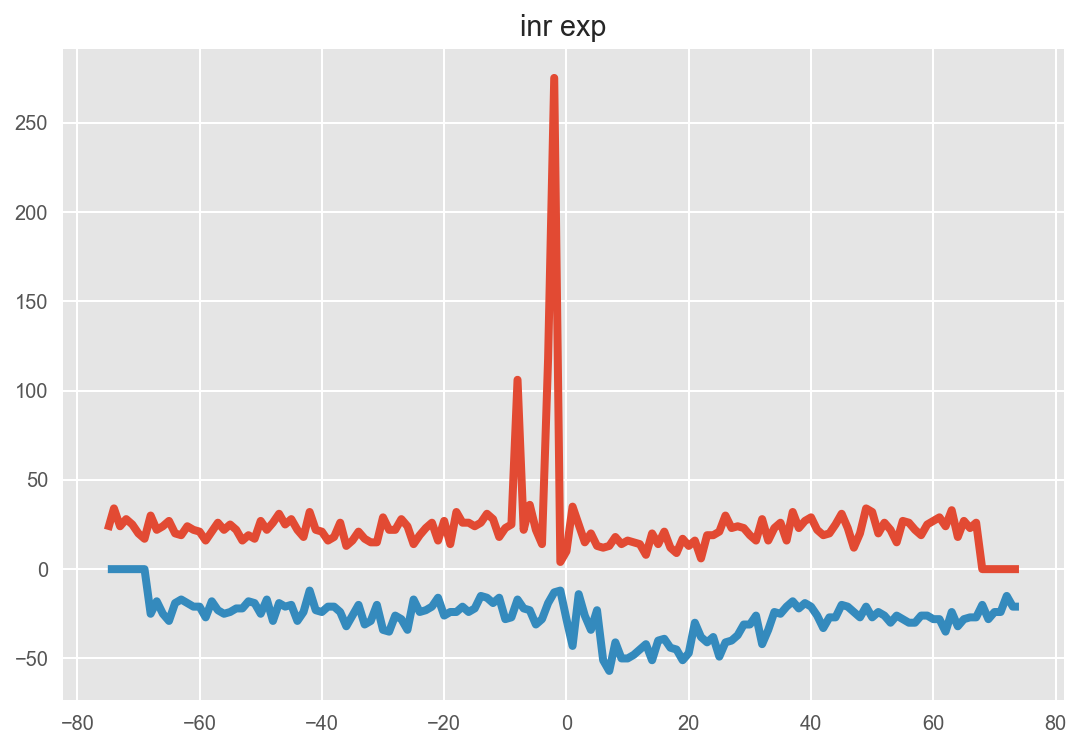

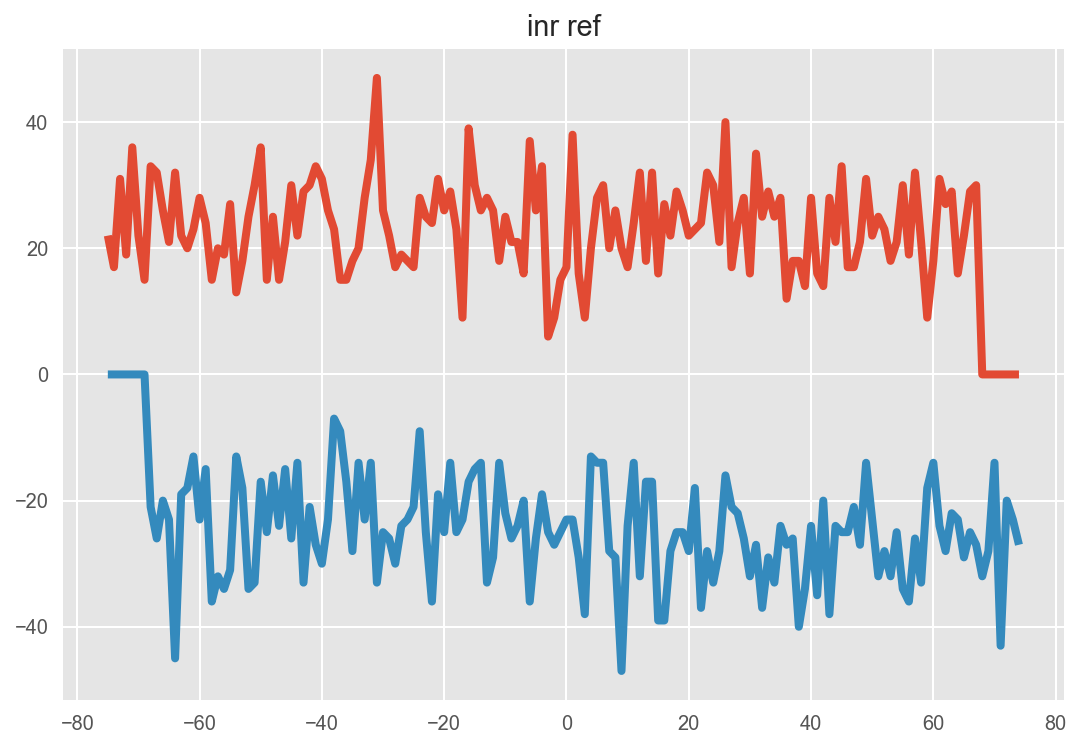

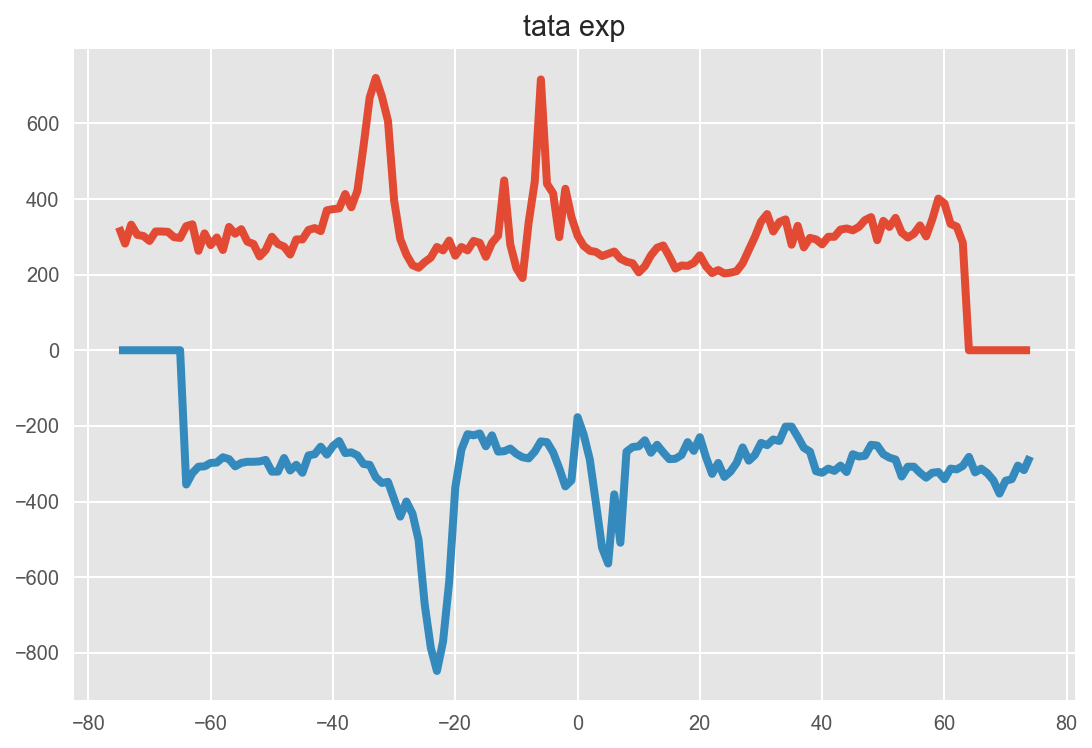

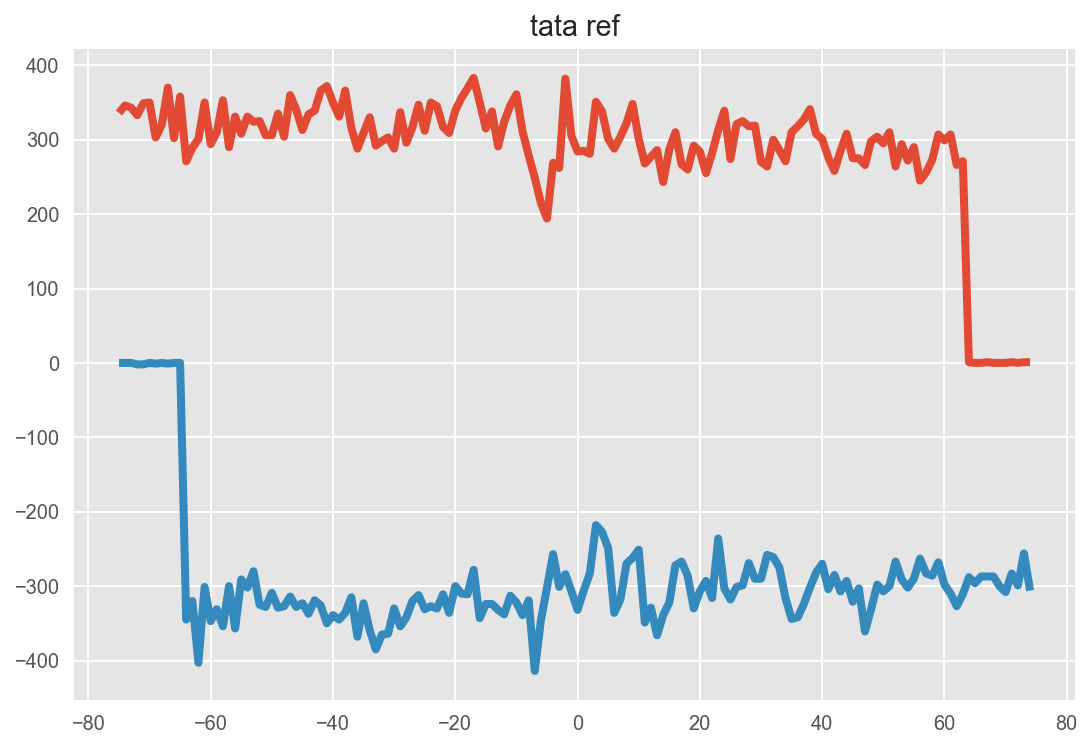

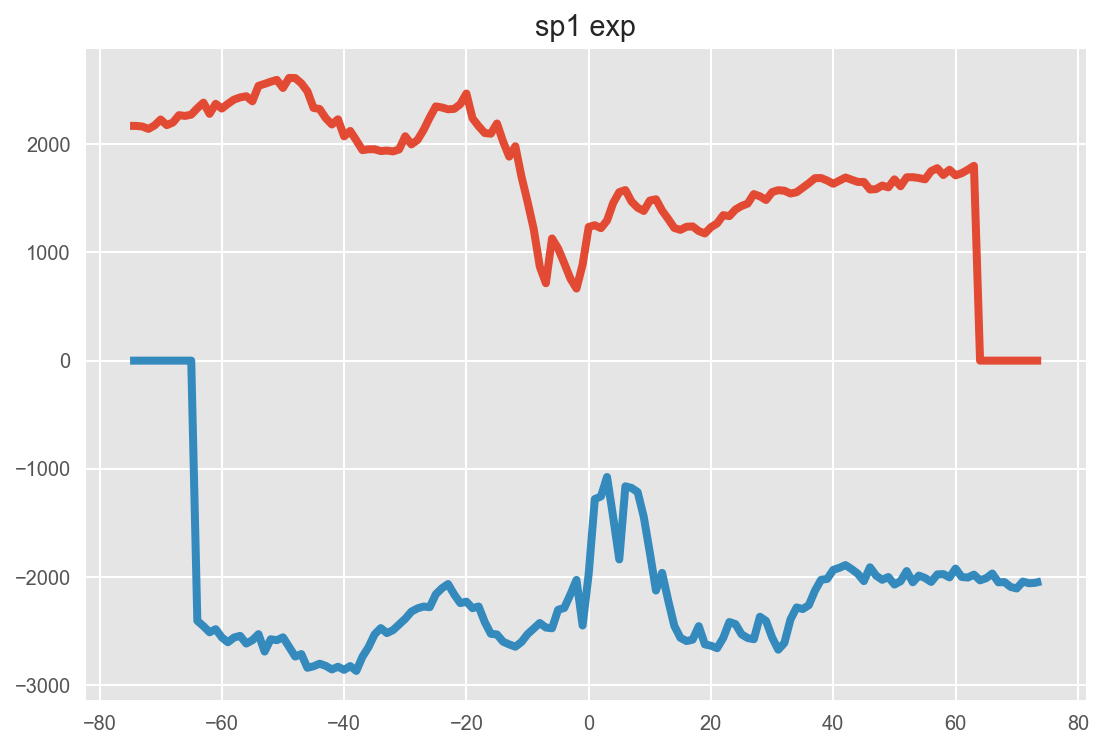

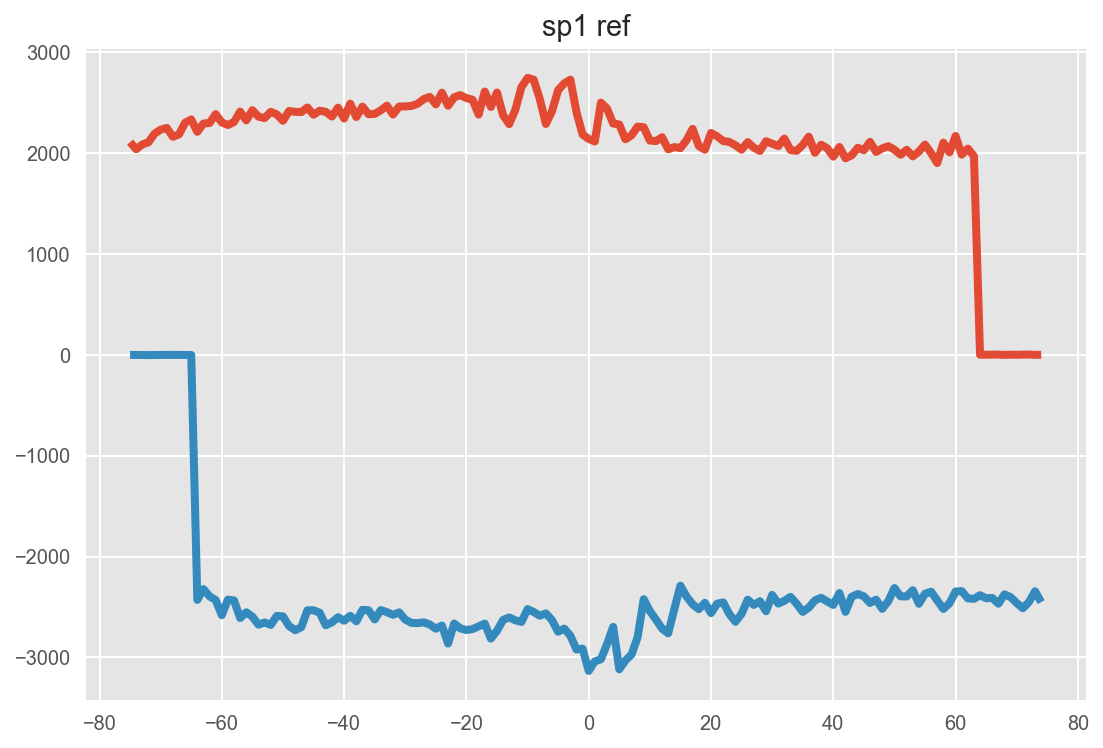

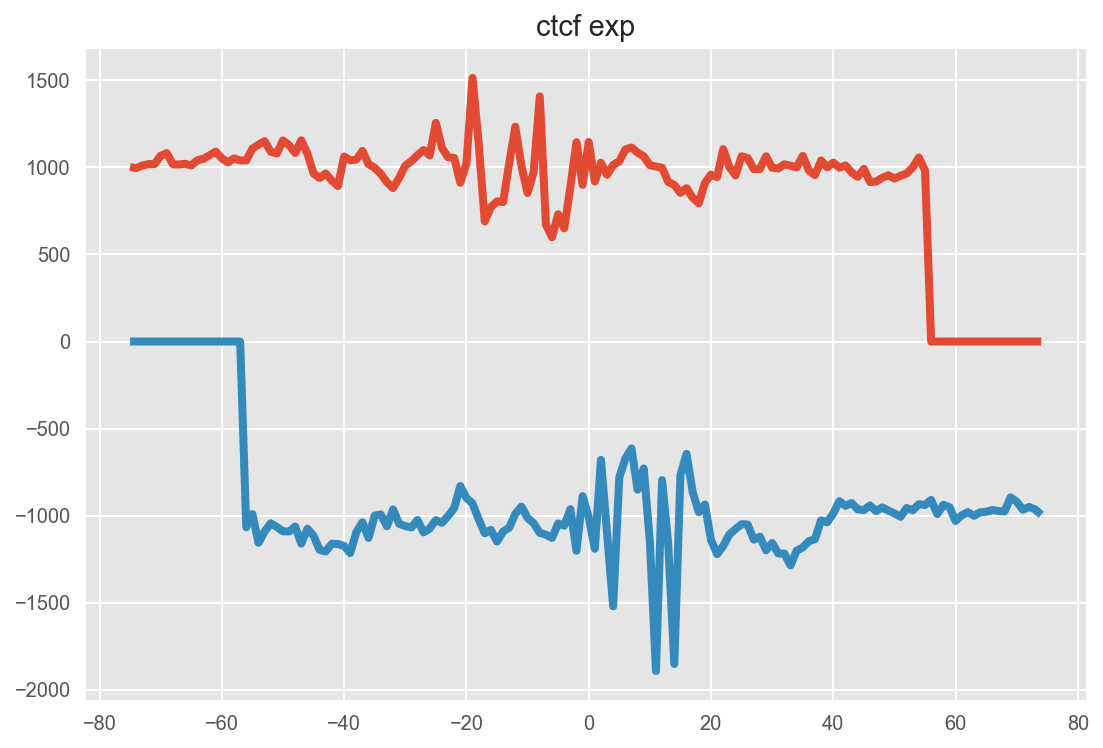

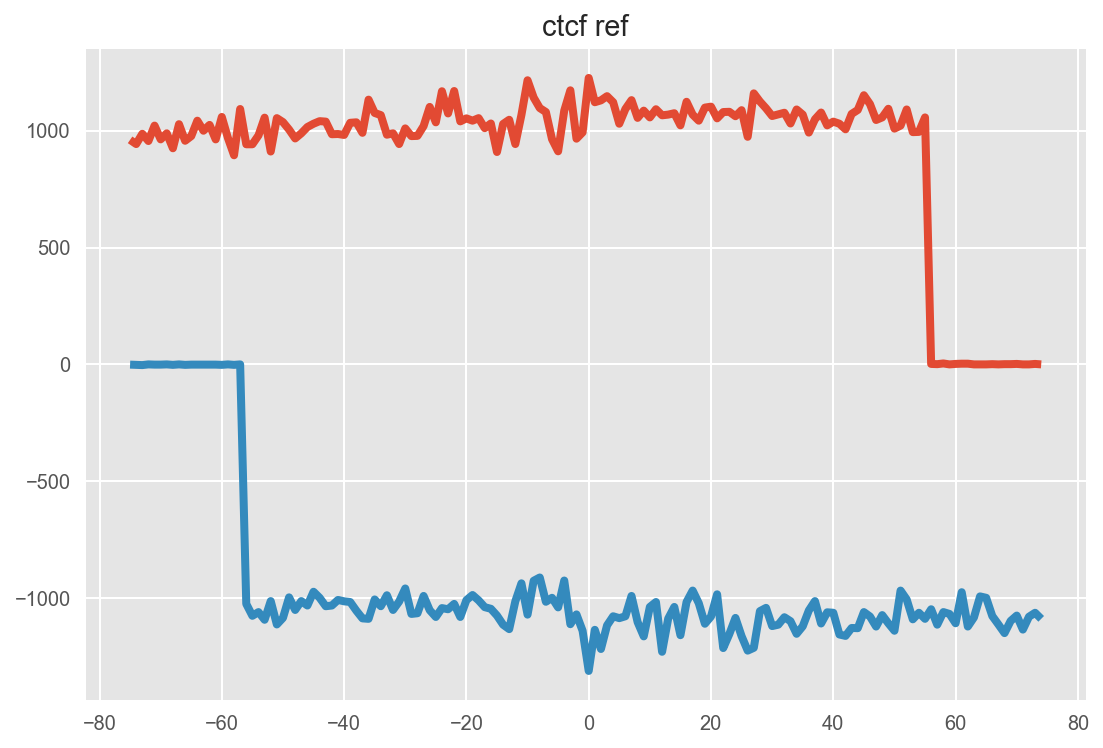

In [42]:
#motifs_list = glob.glob("Results/Figures/SuppFigure3/*instance.p")

#pfm_list = glob.glob(os.path.join(supp_f, "homer_motifs/*.pfm"))
pfm_path = os.path.join(supplemental, "homer_motifs")

#names_list = list(map(lambda x: x.split("instance")[1].replace("_",""), motifs_list))

motifs_list = ['Results/Figures/SuppFigure3/TSS_exp_instance_nonbinV2_inr_instance.p',
               'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_inr_instance.p',
               'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_tata_instance.p',
               'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_tata_instance.p',
               'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_sp1_instance.p',
               'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_sp1_instance.p',
               'Results/Figures/SuppFigure3/TSS_exp_instance_nonbin_ctcf_instance.p',
               'Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_instance_nonbin_ctcf_instance.p',
              ]

names_list = ["inr exp","inr ref", 'tata exp', 'tata ref', 'sp1 exp', 'sp1 ref', 'ctcf exp', 'ctcf ref']
motif_pfm = [os.path.join(pfm_path, "inr.motif.pfm"),os.path.join(pfm_path, "inr.motif.pfm"),
            os.path.join(pfm_path, "tata.motif.pfm"),os.path.join(pfm_path, "tata.motif.pfm"),
            os.path.join(pfm_path, "sp1.motif.pfm"),os.path.join(pfm_path, "sp1.motif.pfm"),
            os.path.join(pfm_path, "ctcf.motif.pfm"),os.path.join(pfm_path, "ctcf.motif.pfm")
            ]

print(names_list)
print(motifs_list)

#peaks_df = pd.read_csv("Results/output/TSS1.exp.bed",sep="\t",index_col=0)

wrap_motifs(motifs_list,names_list,peaks_df,motif_pfm,out_dir="Results/Figures/SuppFigure3/")